In [1]:
# This is boilerplate code to correctly setup the settings to for notebook.
import os, sys
for root, dirs, files in os.walk(os.getcwd()):
    # print(root)

    if "pi0-analysis" in root.split("/"):
        pypath = root.split("pi0-analysis")[0] + "/pi0-analysis/analysis"
        
        print(pypath)
        break

pypath = "/home/bhuller/new_python_test/xs_analysis/pi0-analysis/analysis"
sys.path.insert(0, pypath)

from python.analysis.NotebookUtils import init_notebook
%init_notebook

/home/bhuller/new_python_test/xs_analysis//pi0-analysis/analysis
/home/bhuller/new_python_test/xs_analysis/pi0-analysis/analysis
env: PYTHONPATH=/home/bhuller/new_python_test/xs_analysis/pi0-analysis/analysis


In [2]:
from python.analysis import Master, BeamParticleSelection, cross_section
import awkward as ak
import numpy as np
cross_section.PlotStyler.SetPlotStyle(dark=True)

In [3]:
cfg = cross_section.ApplicationArguments.ResolveConfig(cross_section.LoadConfiguration("/home/bhuller/new_python_test/xs_analysis/work/anlysis_main/cex_analysis_2GeV_config.json"))

In [4]:
cfg.ntuple_files

{'mc': [{'file': '/data/dune/common/PDSPAnalyzer_Ntuples/PDSPProd4a_MC_2GeV_sce_datadriven_ntuple_v09_81_00d01_set0.root',
   'type': 'PDSPAnalyser',
   'pmom': 1},
  {'file': '/data/dune/common/PDSPAnalyzer_Ntuples/PDSPProd4a_MC_2GeV_sce_datadriven_ntuple_v09_81_00d01_set1.root',
   'type': 'PDSPAnalyser',
   'pmom': 1},
  {'file': '/data/dune/common/PDSPAnalyzer_Ntuples/PDSPProd4a_MC_2GeV_sce_datadriven_ntuple_v09_81_00d01_set2.root',
   'type': 'PDSPAnalyser',
   'pmom': 1},
  {'file': '/data/dune/common/PDSPAnalyzer_Ntuples/PDSPProd4a_MC_2GeV_sce_datadriven_ntuple_v09_81_00d01_set3.root',
   'type': 'PDSPAnalyser',
   'pmom': 1},
  {'file': '/data/dune/common/PDSPAnalyzer_Ntuples/PDSPProd4a_MC_2GeV_reco1_sce_datadriven_v1_ntuple_v09_41_00_03.root',
   'type': 'PDSPAnalyser',
   'pmom': 2}],
 'data': [{'file': '/data/dune/common/PDSPAnalyzer_Ntuples/PDSPProd4_data_2GeV_reco2_ntuple_v09_42_03_01.root',
   'type': 'PDSPAnalyser',
   'pmom': 1}]}

In [5]:
file_descriptor = cfg.ntuple_files["mc"][0]
mc = Master.Data(file_descriptor["file"], nTuple_type=file_descriptor["type"], target_momentum = file_descriptor["pmom"])

In [62]:
from python.analysis import RegionIdentification, ProcessDefinitions, RegionIdentification
from apps import cex_analysis_input

In [65]:
# n_pi, n_pi0 = cex_analysis_input.GetTruePionCounts(mc)
ri = {}
for r in RegionIdentification.regions:
    reco_regions, _ = cex_analysis_input.RegionSelection(mc, cfg, True, r, True)
    ri[r] = reco_regions

f=<Array [True, False, True, True, ..., False, True, False] type='131266 * bool'>


'RegionSelection' executed in 7.9275s

f=<Array [True, False, True, True, ..., False, True, False] type='131266 * bool'>


'RegionSelection' executed in 7.9001s

f=<Array [True, False, True, True, ..., False, True, False] type='131266 * bool'>


'RegionSelection' executed in 9.0066s

f=<Array [True, False, True, True, ..., False, True, False] type='131266 * bool'>


'RegionSelection' executed in 3.0910s

f=<Array [True, False, True, True, ..., False, True, False] type='131266 * bool'>


'RegionSelection' executed in 6.1557s

In [58]:
selection_masks = cfg.selection_masks["mc"]

counts = {}
for obj in selection_masks:
    if obj in ["beam", "null_pfo", "fiducial"]: continue
    counts[f"n_{obj}"] = cross_section.SelectionTools.GetPFOCounts(selection_masks[obj][mc.filename])


In [70]:
ri_new = {}
for r in RegionDefinitions.regions:
    rdef = r()
    ri_new[r.__name__] = rdef.CreateDefinitions(counts, uncategorised = True)

In [74]:
print(ri.keys())
print(ri_new.keys())

dict_keys(['high_purity', 'high_efficiency', 'moderate_efficiency', 'jakes', 'default'])
dict_keys(['default', 'pdsp_1GeV_regions', 'moderate_efficiency_regions', 'high_efficiency_regions', 'high_purity_regions'])


In [168]:
def match(selections, events):
    for k in selections.keys():
        if events.filename in k: break
    return k
        
key = match(cfg.selection_masks["mc"]["beam"], mc)

fiducial_cuts = cfg.selection_masks["mc"]["fiducial"][key]
beam_cuts = cfg.selection_masks["mc"]["beam"][key]

print(fiducial_cuts)
print(beam_cuts)

{
    'TrueFiducialCut': <Array [True, False, True, True, ..., True, True, False] type='131266 * bool'>,
    'APA3Cut': <Array [True, True, True, True, ..., False, True, False] type='131266 * bool'>
}

{
    'TrueFiducialCut': <Array [True, True, True, True, ..., True, True, True] type='52654 * bool'>,
    'PiBeamSelection': <Array [False, True, True, True, ..., False, True, True] type='52654 * bool'>,
    'PandoraTagCut': <Array [True, True, True, True, ..., True, True, True] type='52654 * bool'>,
    'CaloSizeCut': <Array [True, True, True, True, ..., True, True, True] type='52654 * bool'>,
    'HasFinalStatePFOsCut': <Array [True, True, True, True, ..., True, True, True] type='52654 * bool'>,
    'APA3Cut': <Array [True, True, True, True, ..., True, True, True] type='52654 * bool'>,
    'DxyCut': <Array [True, False, True, True, ..., True, True, False] type='52654 * ?bool'>,
    'CosThetaCut': <Array [True, True, True, True, ..., True, True, False] type='52654 * ?bool'>,
    'MichelScoreCut': <Array [True, True, True, True, ..., True, True, True] type='52654 * bool'>,
    'MedianDEdXCut': <Array [True, True, True, True, ..., True, True, False] type='52654 * bool'>,
    'BeamScraperCut': <Array [True, True, True, True, ..., True, True, False] type='52654 * bool'>
}

In [128]:
true_beam_tags = cross_section.Tags.GenerateTrueBeamParticleTags(mc)

true_regions = cross_section.RegionIdentification.TrueRegions(mc.trueParticles.nPi0, mc.trueParticles.nPiPlus + mc.trueParticles.nPiMinus)
for k in true_regions.keys():
    true_regions[k] = true_regions[k] & true_beam_tags["$\\pi^{+}$:inel"].mask

true_region_tags = cross_section.Tags.ExclusiveProcessTags(true_regions)

tags = true_beam_tags | true_region_tags
tags.pop("$\\pi^{+}$:inel")

for e, k in enumerate(tags):
    tags[k].number = e

tags = cross_section.Tags.Tags(tags)
tags

{'$\\pi^{+}$:decay': Tag(name='$\\pi^{+}$:decay', name_simple='$\\pi^{+}$:decay', colour='C1', mask=<Array [False, False, False, ..., False, False, False] type='131266 * bool'>, number=0),
 '$\\mu^{+}$': Tag(name='$\\mu^{+}$', name_simple='$\\mu^{+}$', colour='C2', mask=<Array [False, False, False, ..., False, False, True] type='131266 * bool'>, number=1),
 '$e^{+}$': Tag(name='$e^{+}$', name_simple='$e^{+}$', colour='C3', mask=<Array [False, False, False, ..., False, False, False] type='131266 * bool'>, number=2),
 '$p$': Tag(name='$p$', name_simple='$p$', colour='C4', mask=<Array [True, False, False, False, ..., True, True, False] type='131266 * bool'>, number=3),
 '$K^{+}$': Tag(name='$K^{+}$', name_simple='$K^{+}$', colour='C5', mask=<Array [False, False, False, ..., False, False, False] type='131266 * bool'>, number=4),
 'other': Tag(name='other', name_simple='other', colour='C6', mask=<Array [False, False, False, ..., False, False, False] type='131266 * bool'>, number=5),
 'cosmi

In [166]:
import copy
def UpdateTagMasks(tags : cross_section.Tags, mask : ak.Array | np.ndarray) -> cross_section.Tags:
    updated_tags = cross_section.Tags.Tags()
    for t in tags:
        updated_tags[t] = copy.deepcopy(tags[t])
        updated_tags[t].mask = updated_tags[t].mask[mask]
    return updated_tags

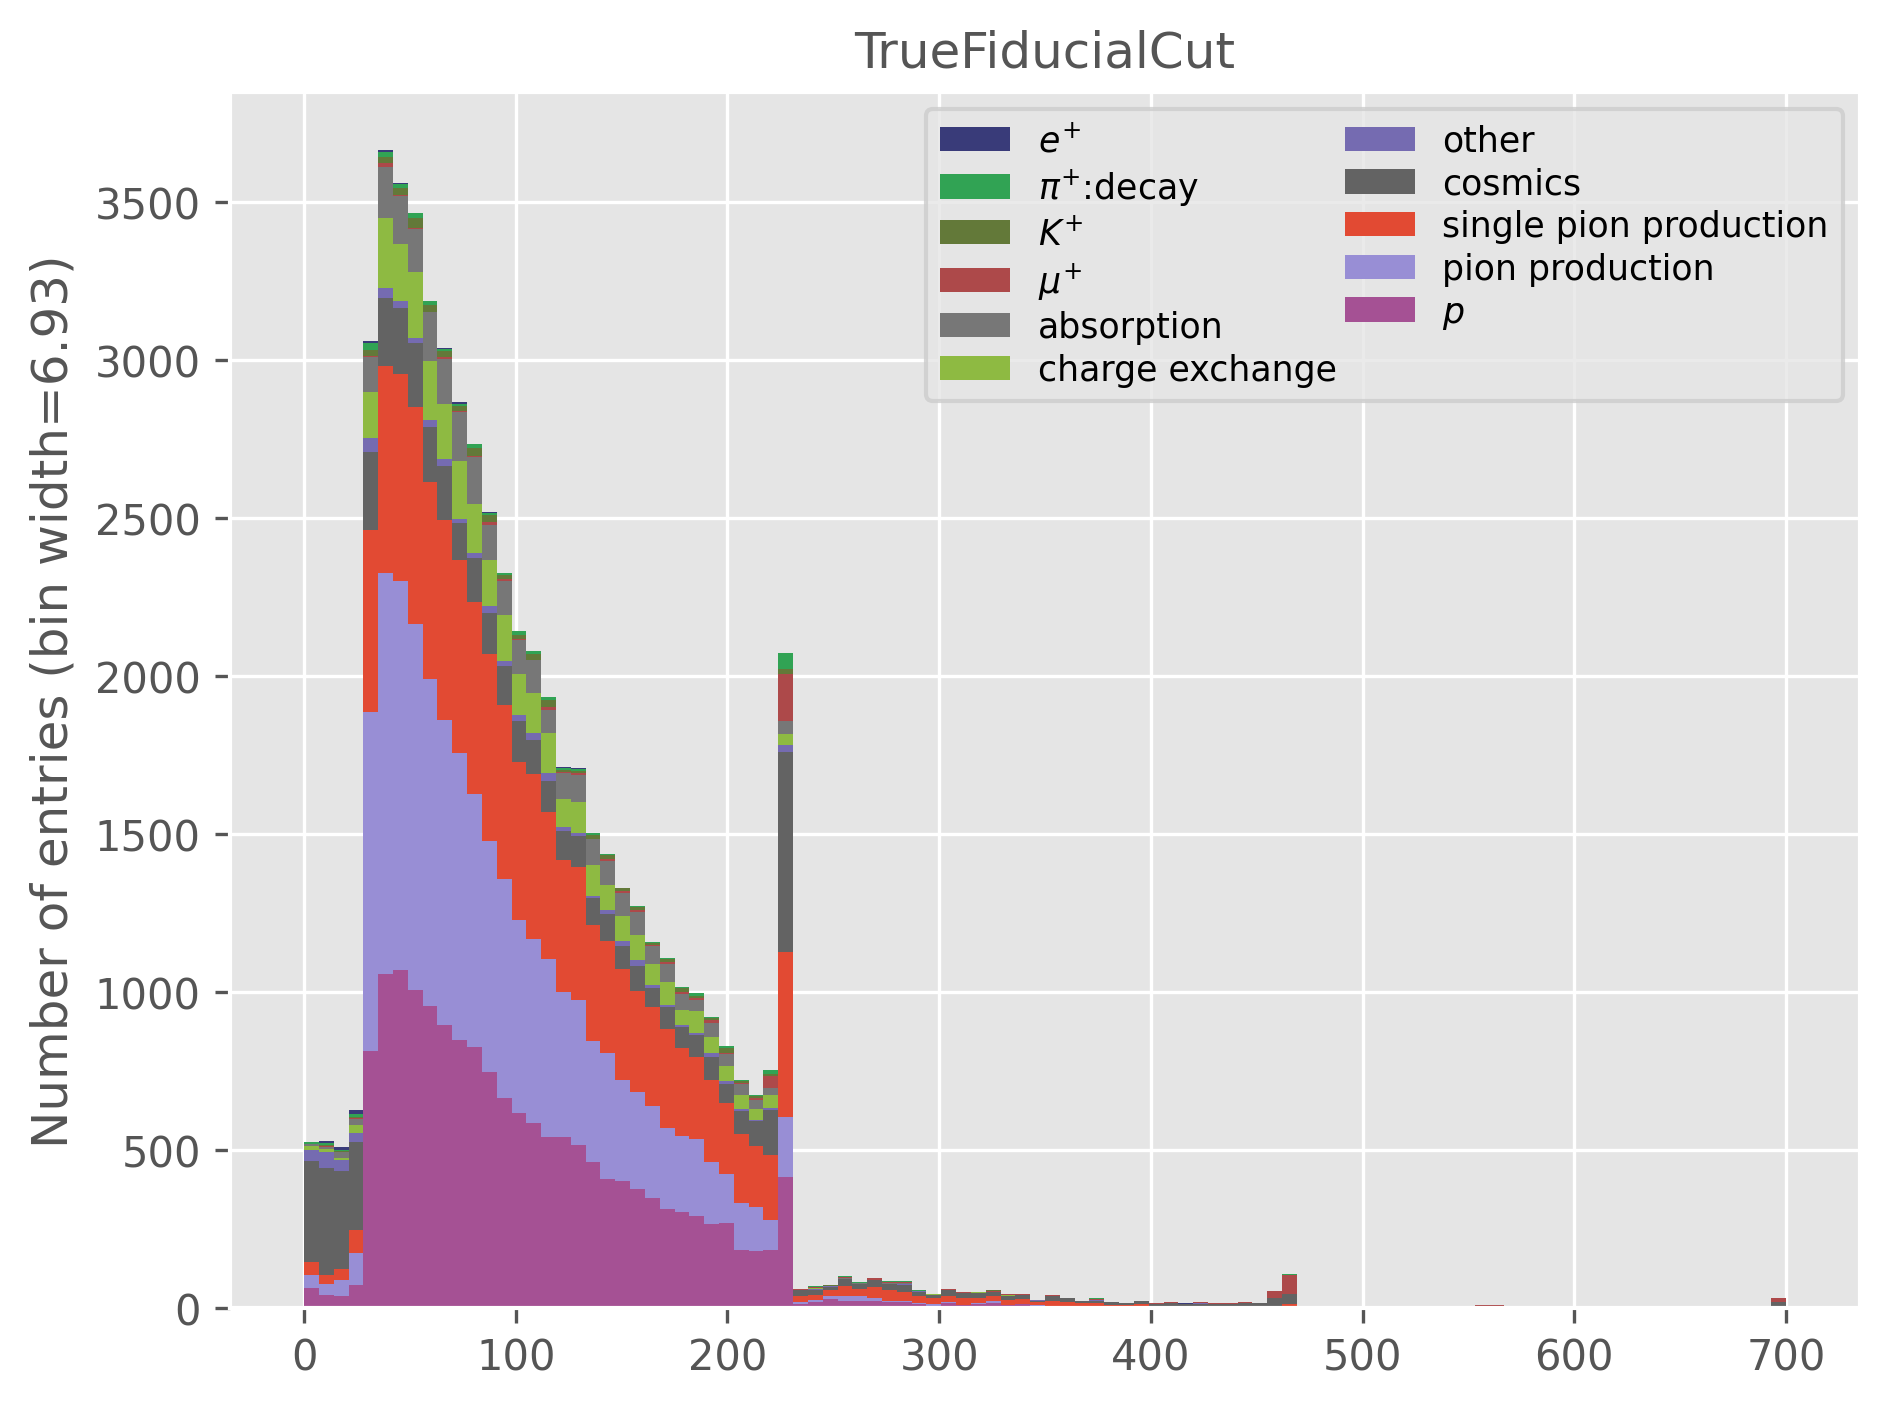

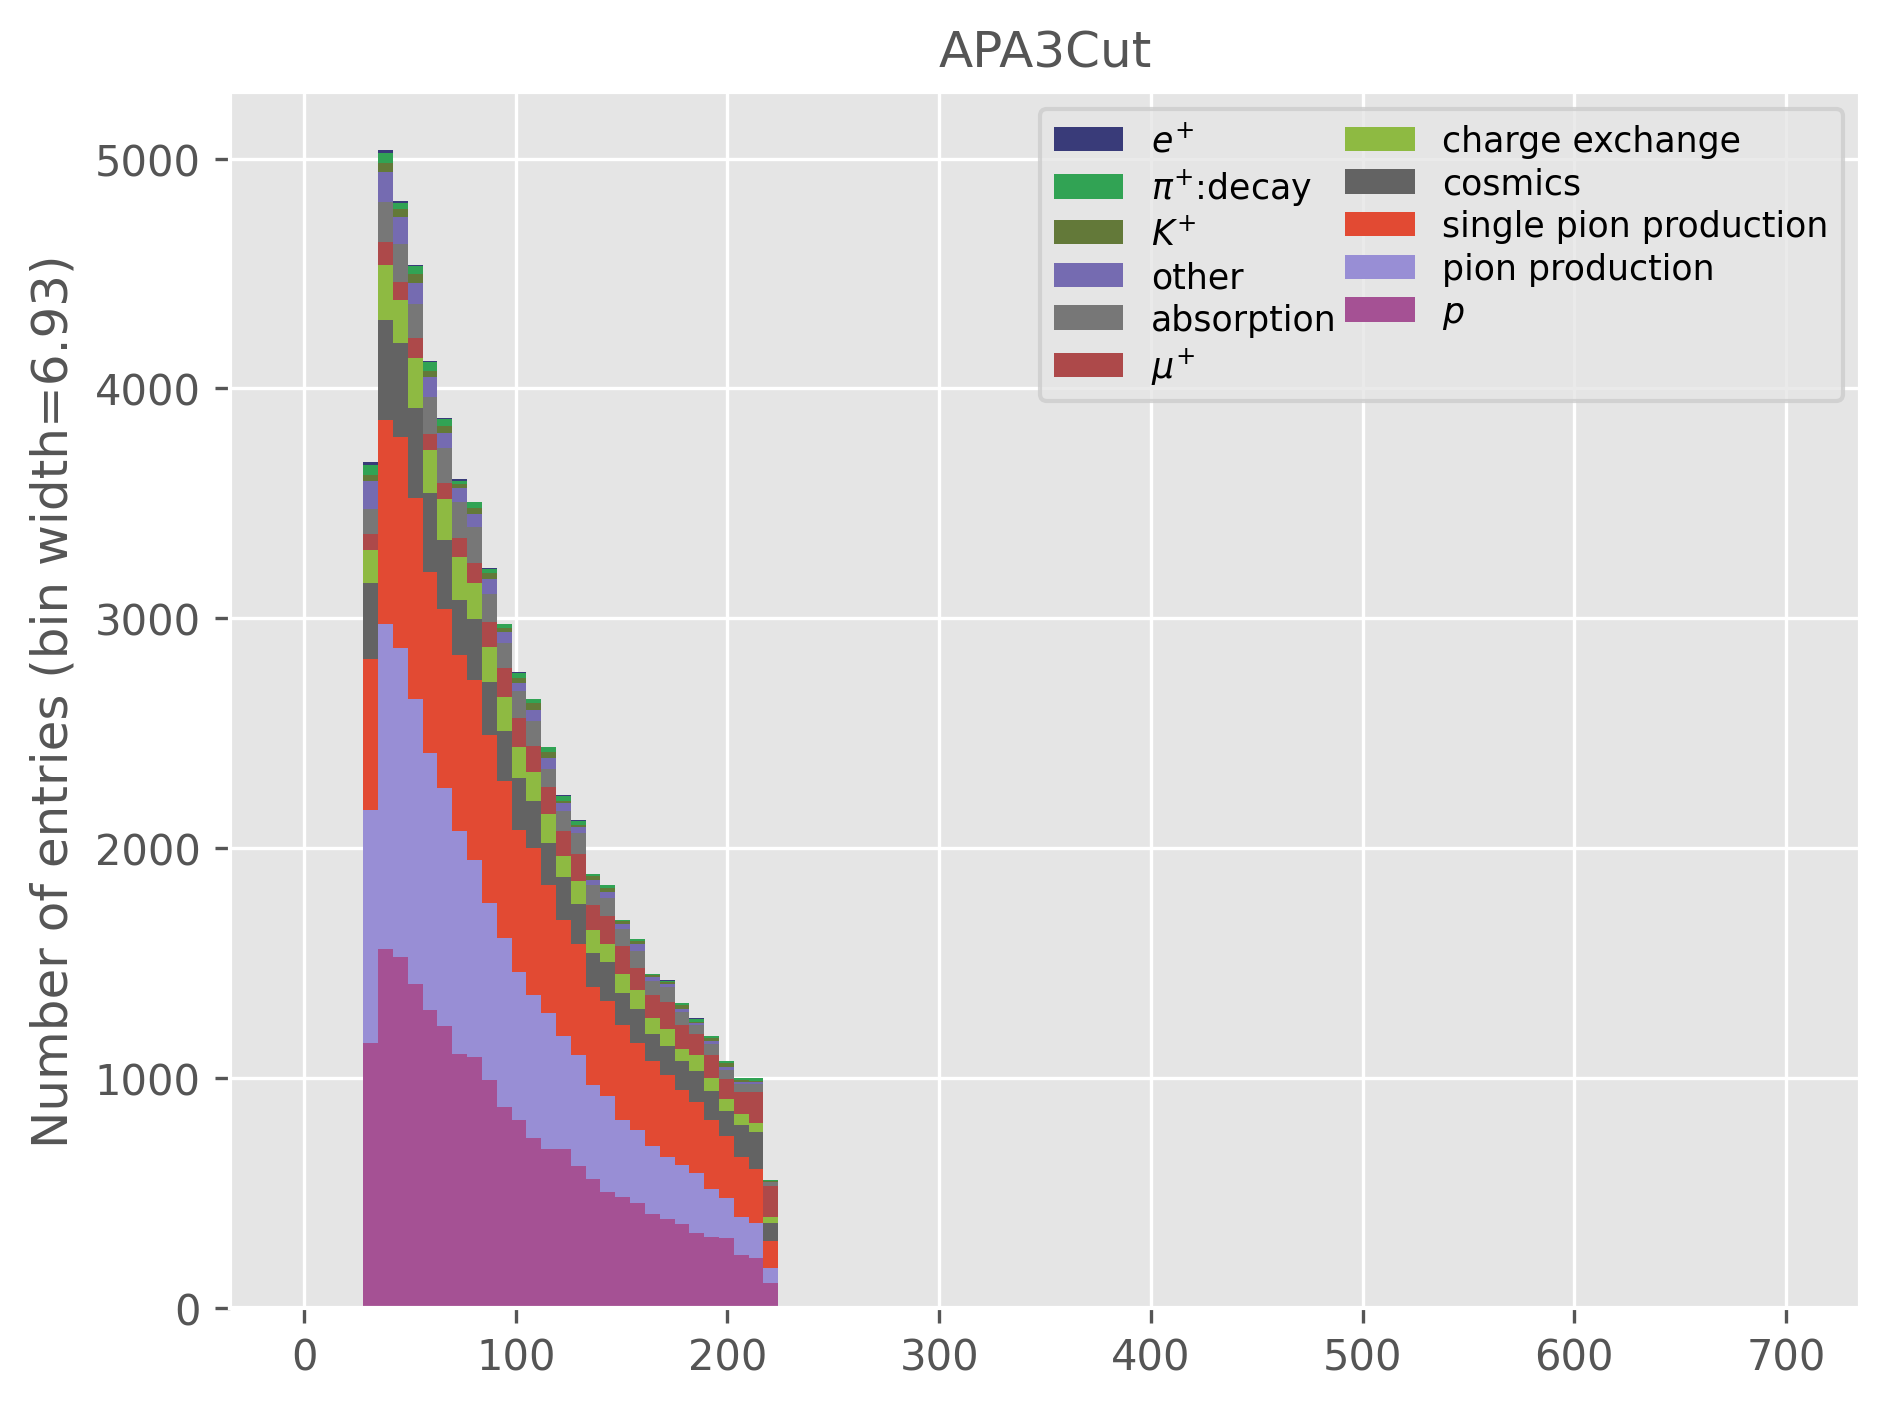

In [129]:
# new_tags = UpdateTagMasks(tags, ["APA3Cut"], operator.and_)

for k, v in fiducial_cuts.items():
    selected = mc.recoParticles.beam_endPos_SCE.z[v]
    new_tags = UpdateTagMasks(tags, v)
    cross_section.Plots.PlotTagged(selected, new_tags, x_range = [0, 700], title = k)


TrueFiducialCut

PiBeamSelection

PandoraTagCut

CaloSizeCut

HasFinalStatePFOsCut

APA3Cut

DxyCut

CosThetaCut

MichelScoreCut

MedianDEdXCut

BeamScraperCut

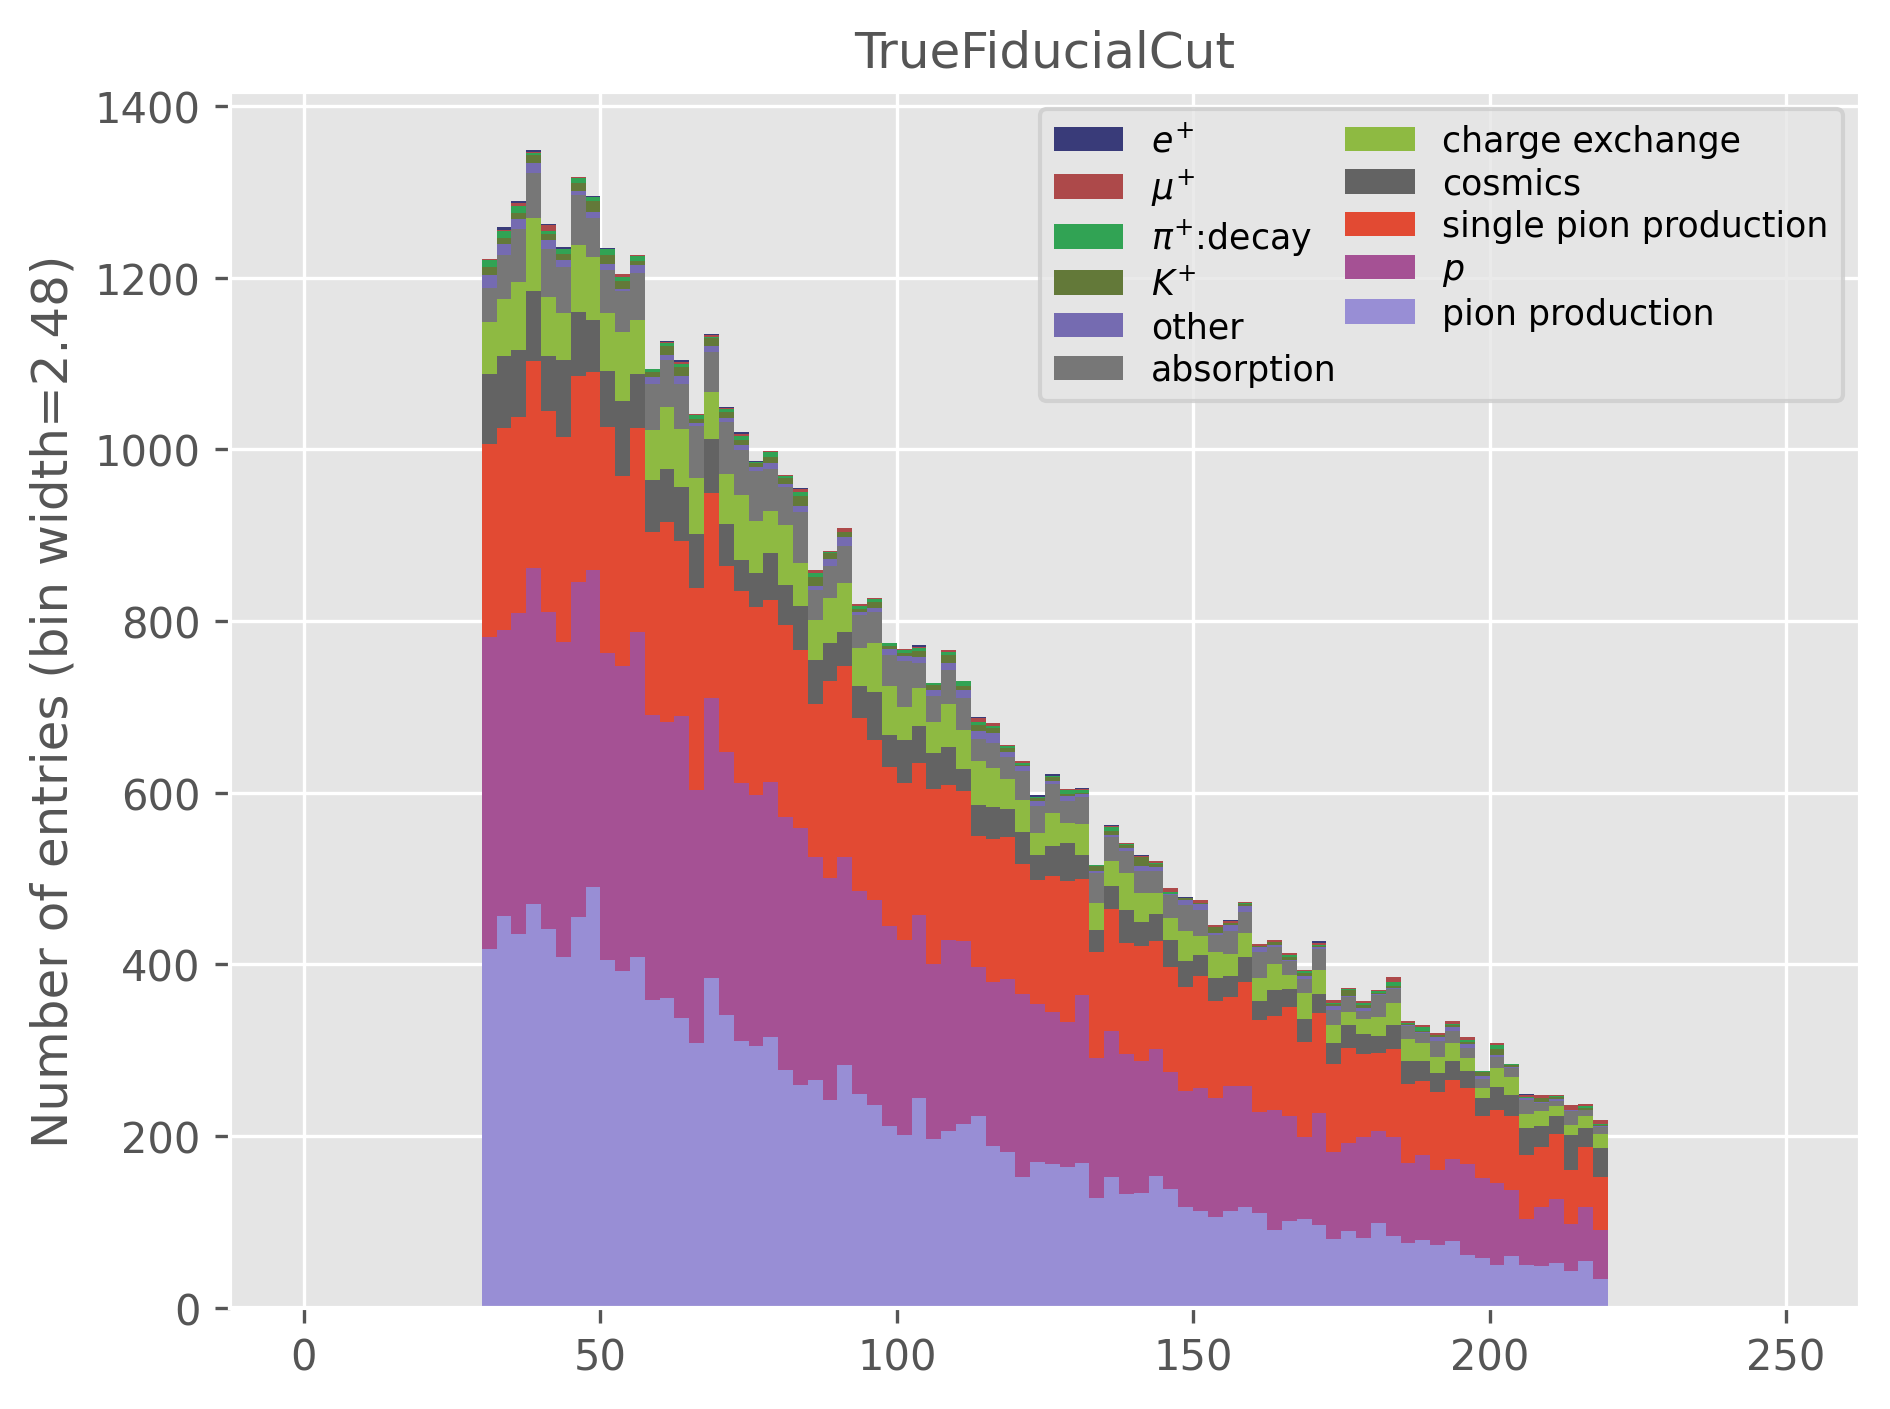

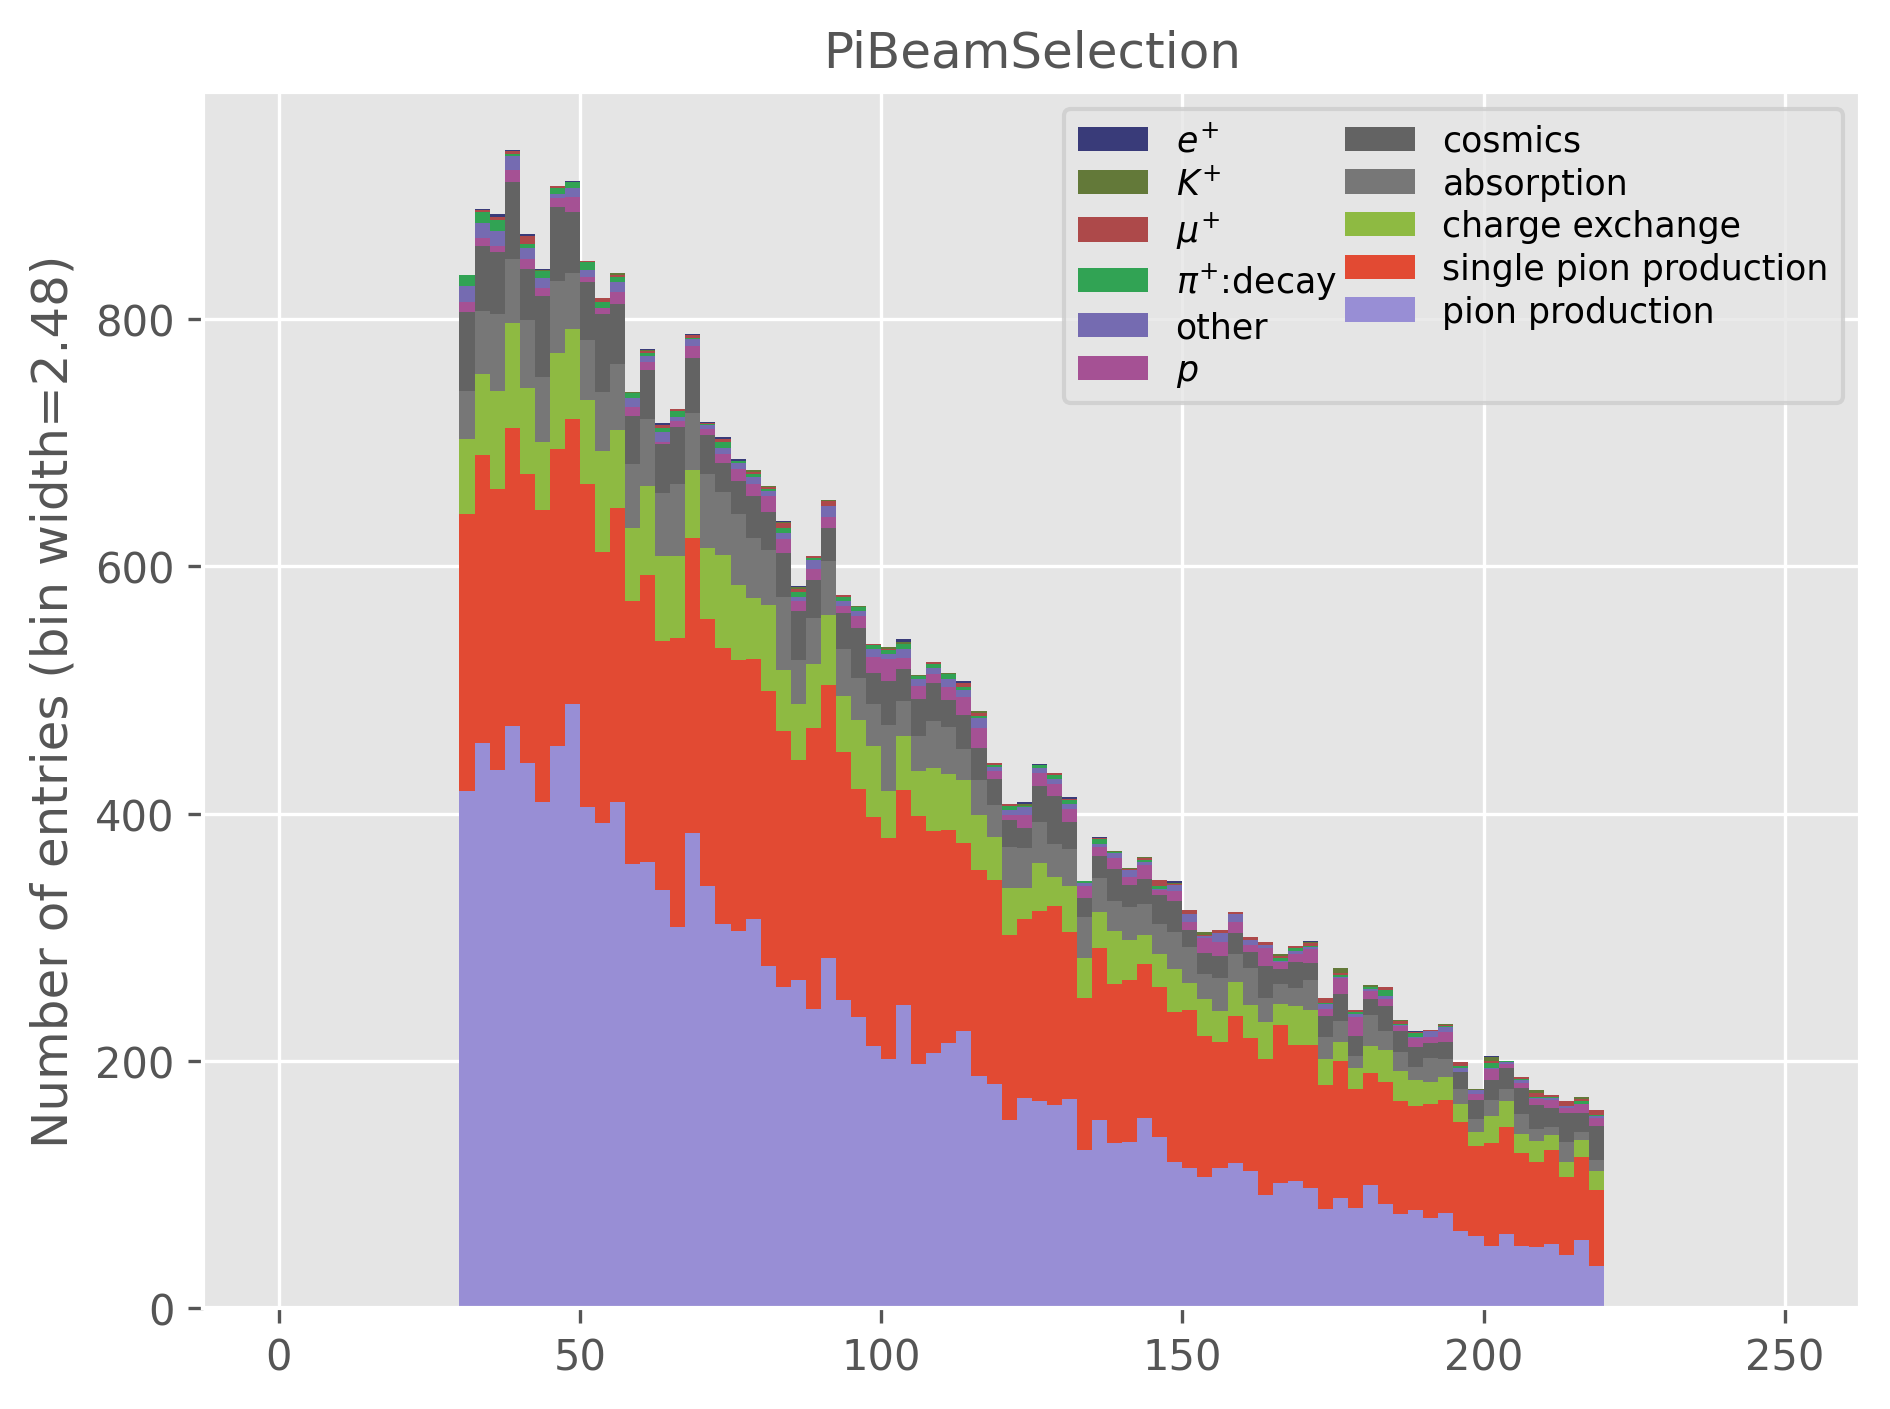

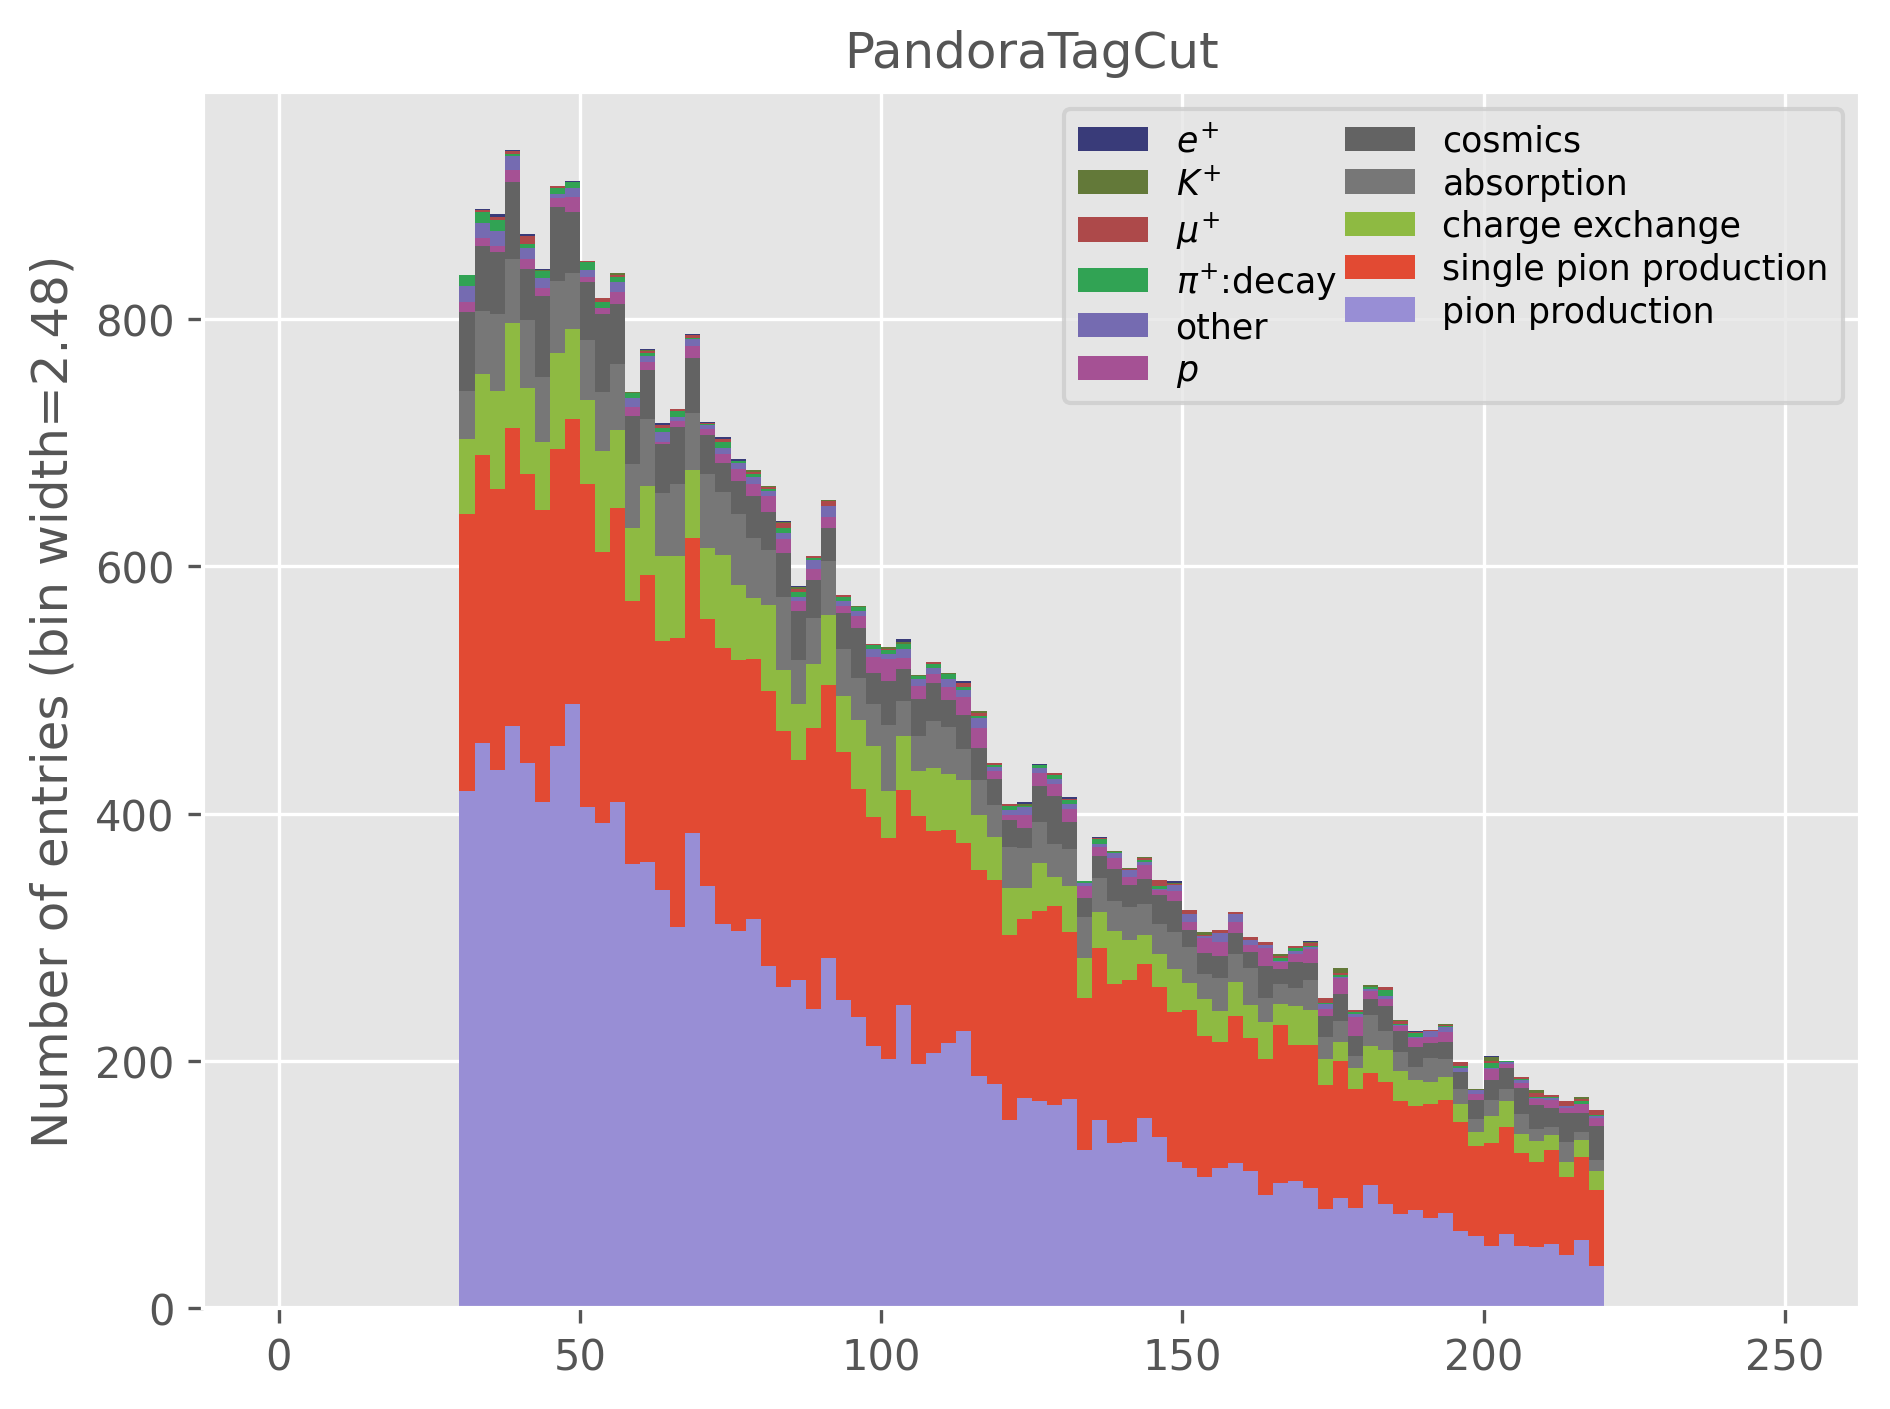

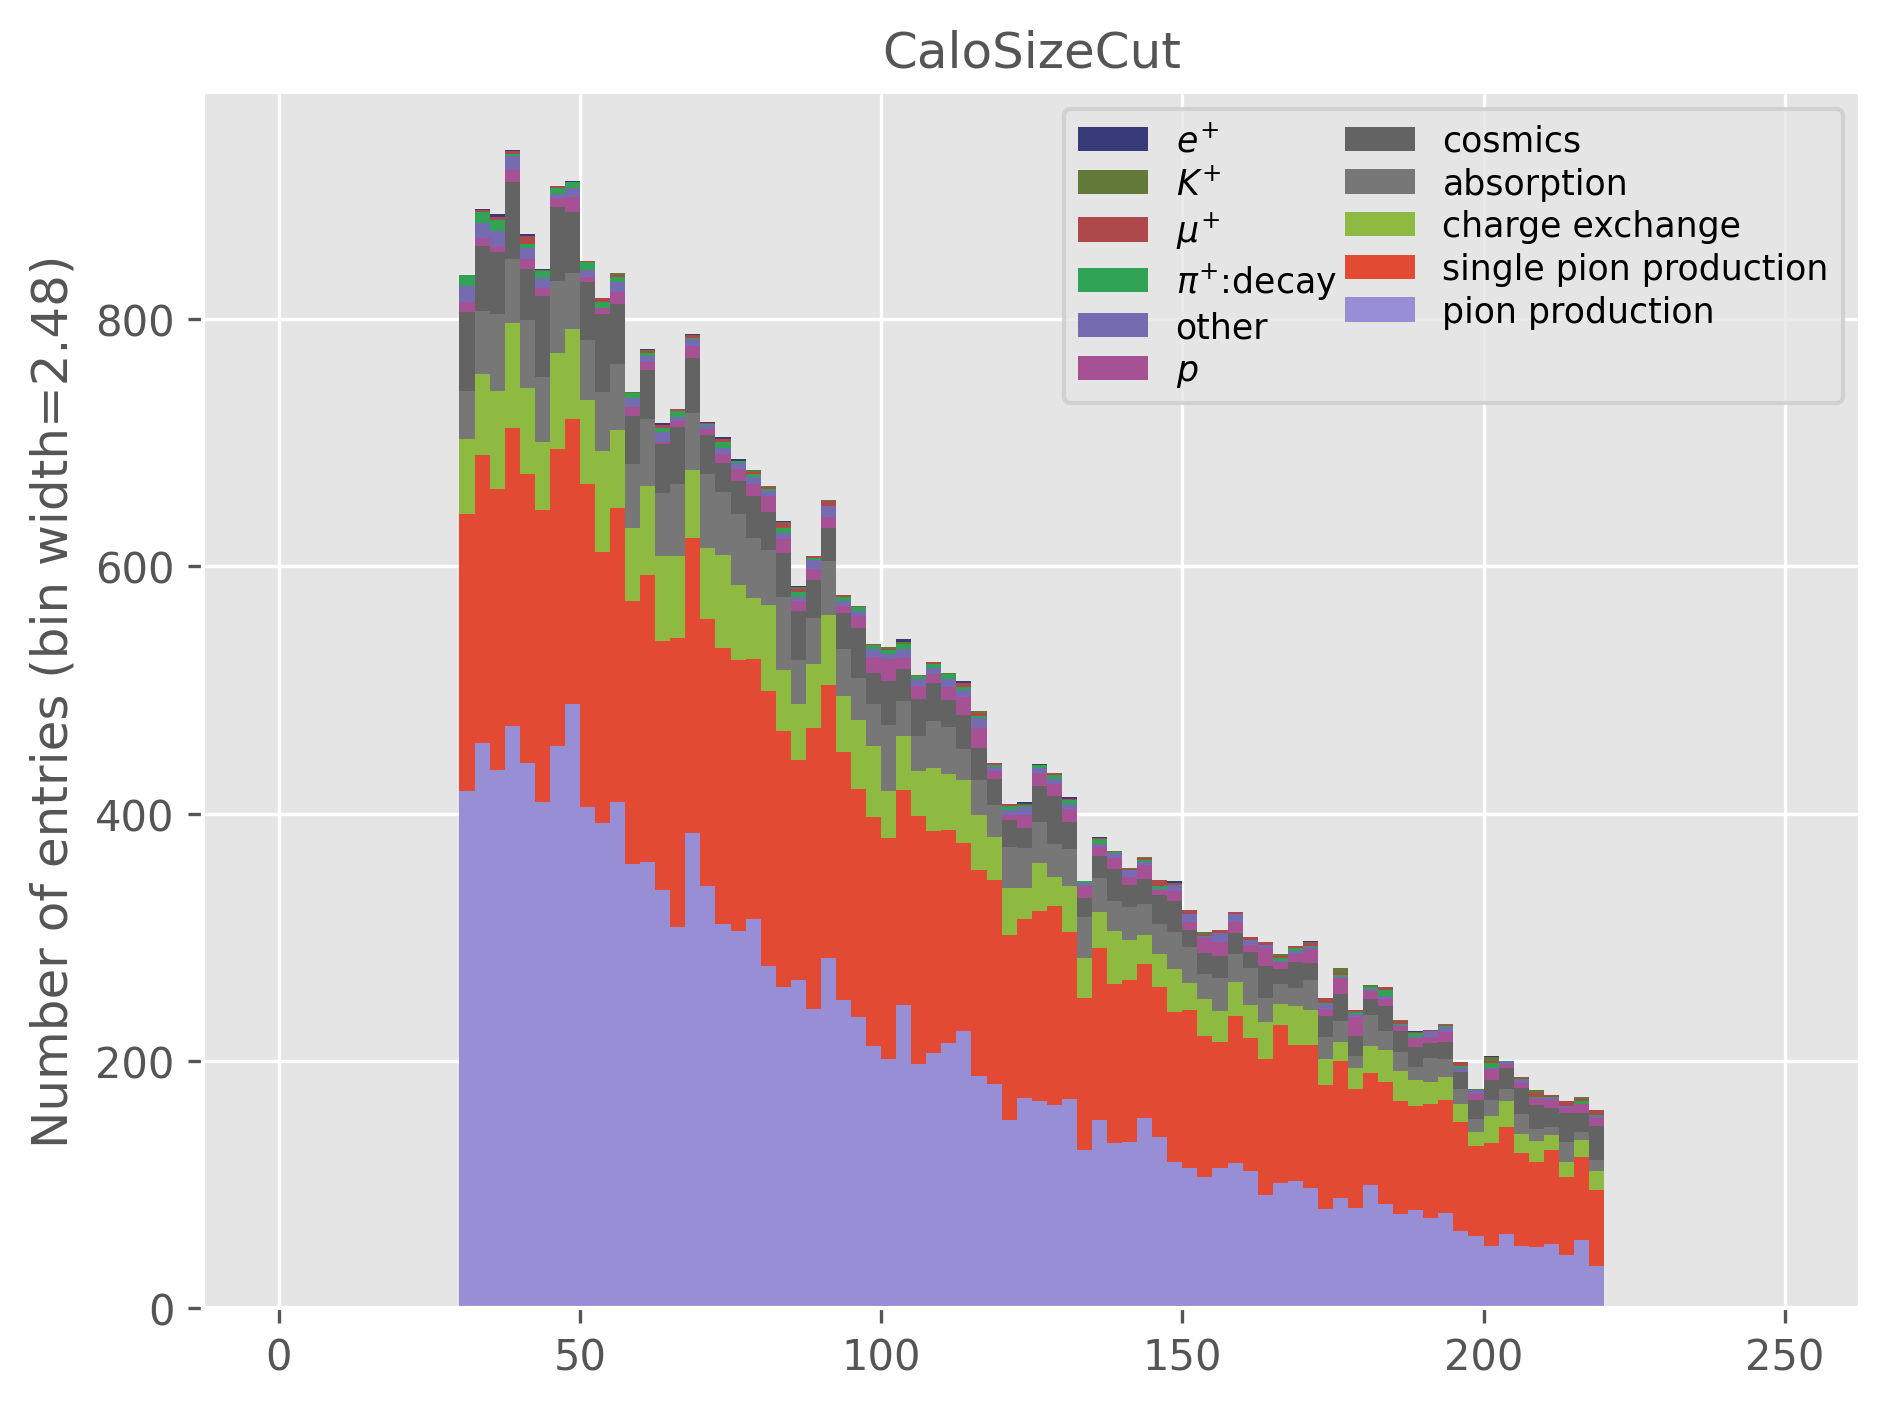

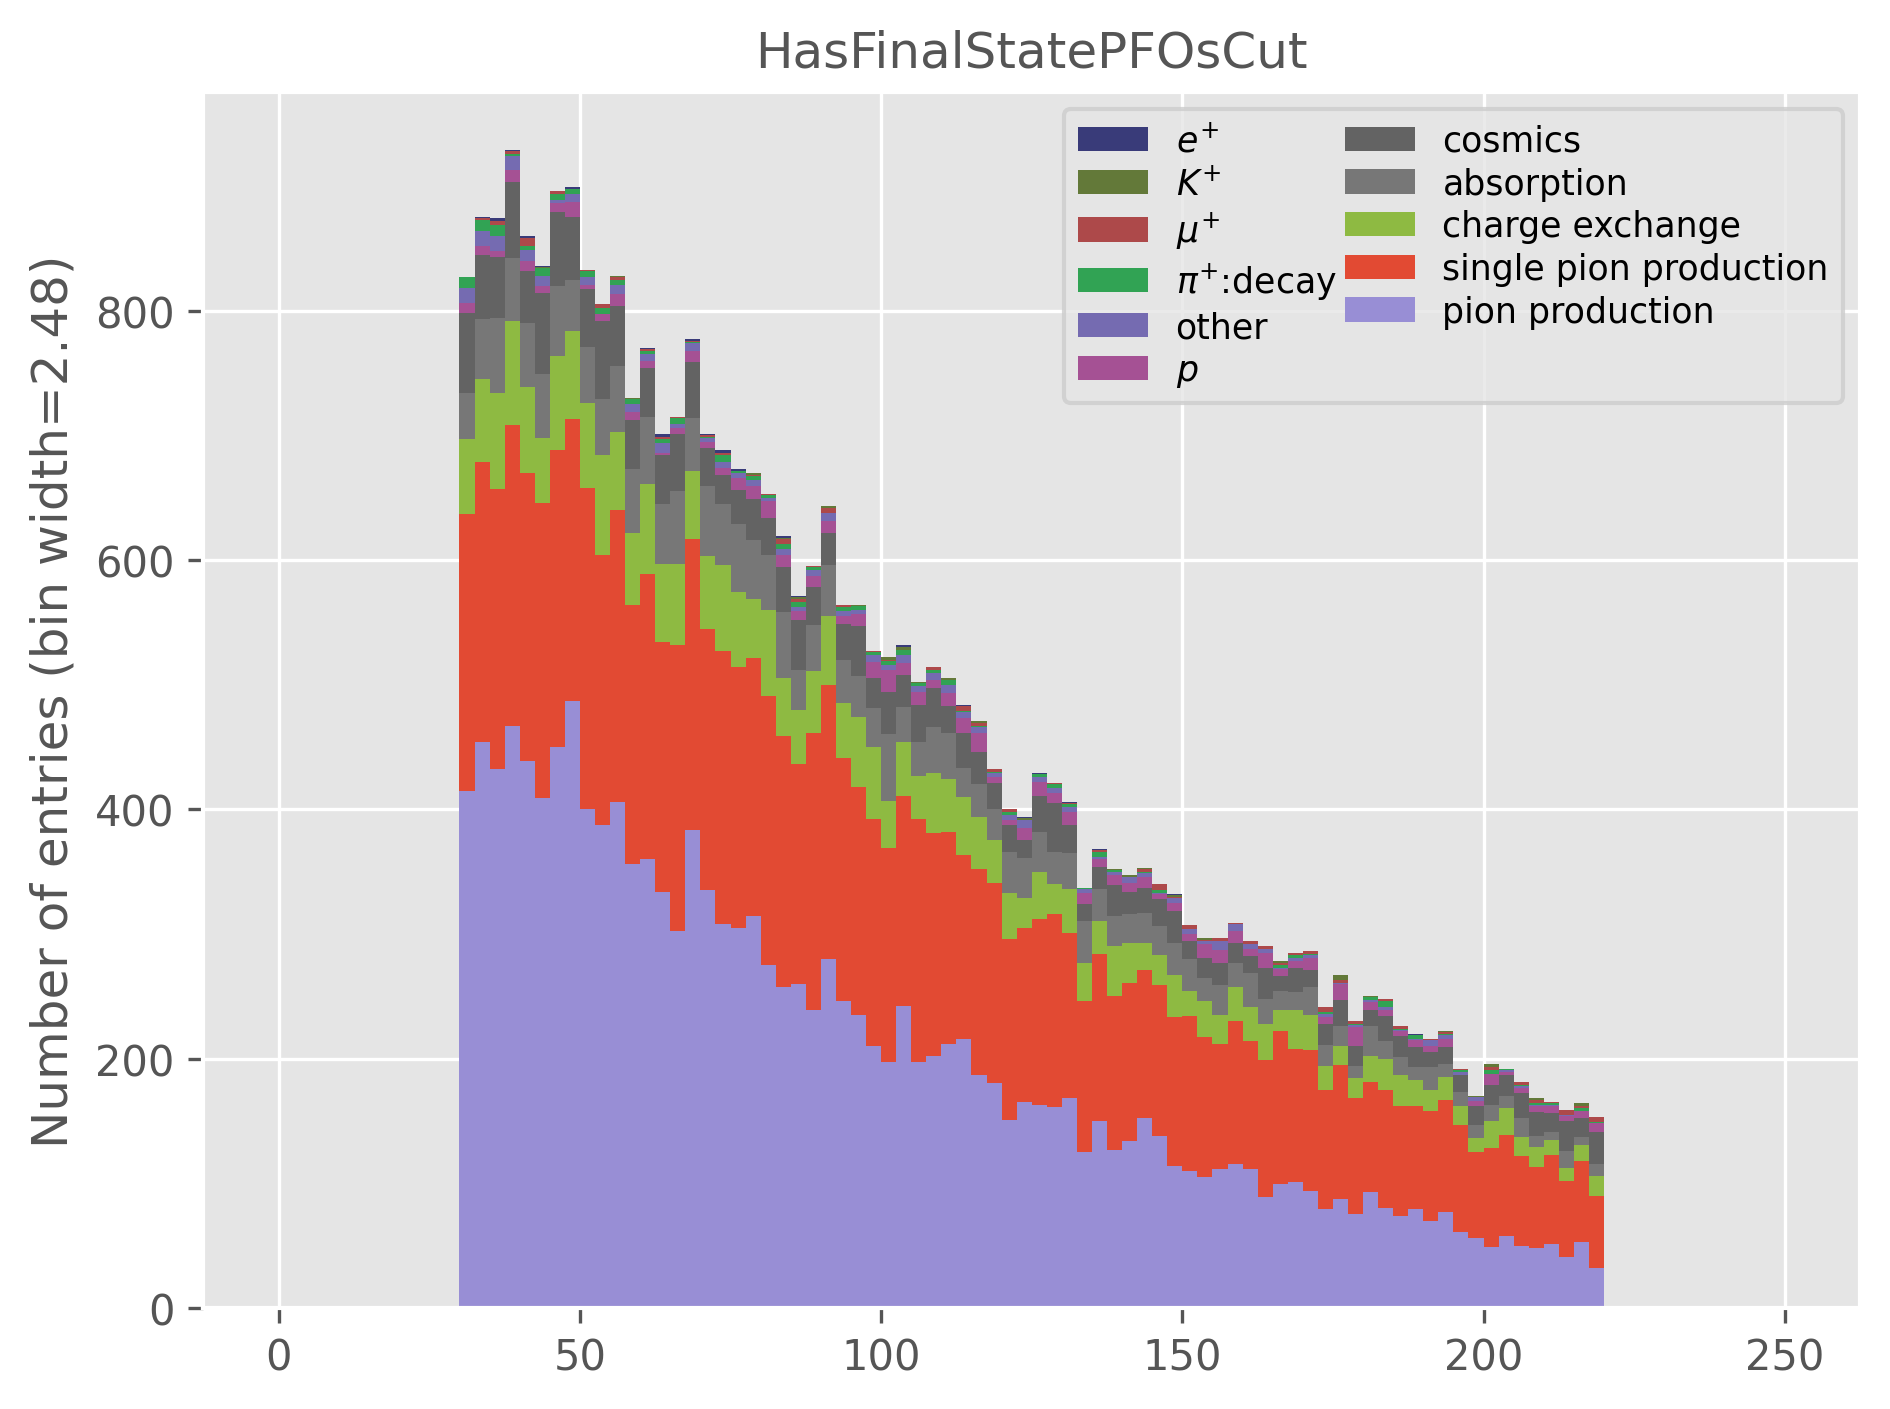

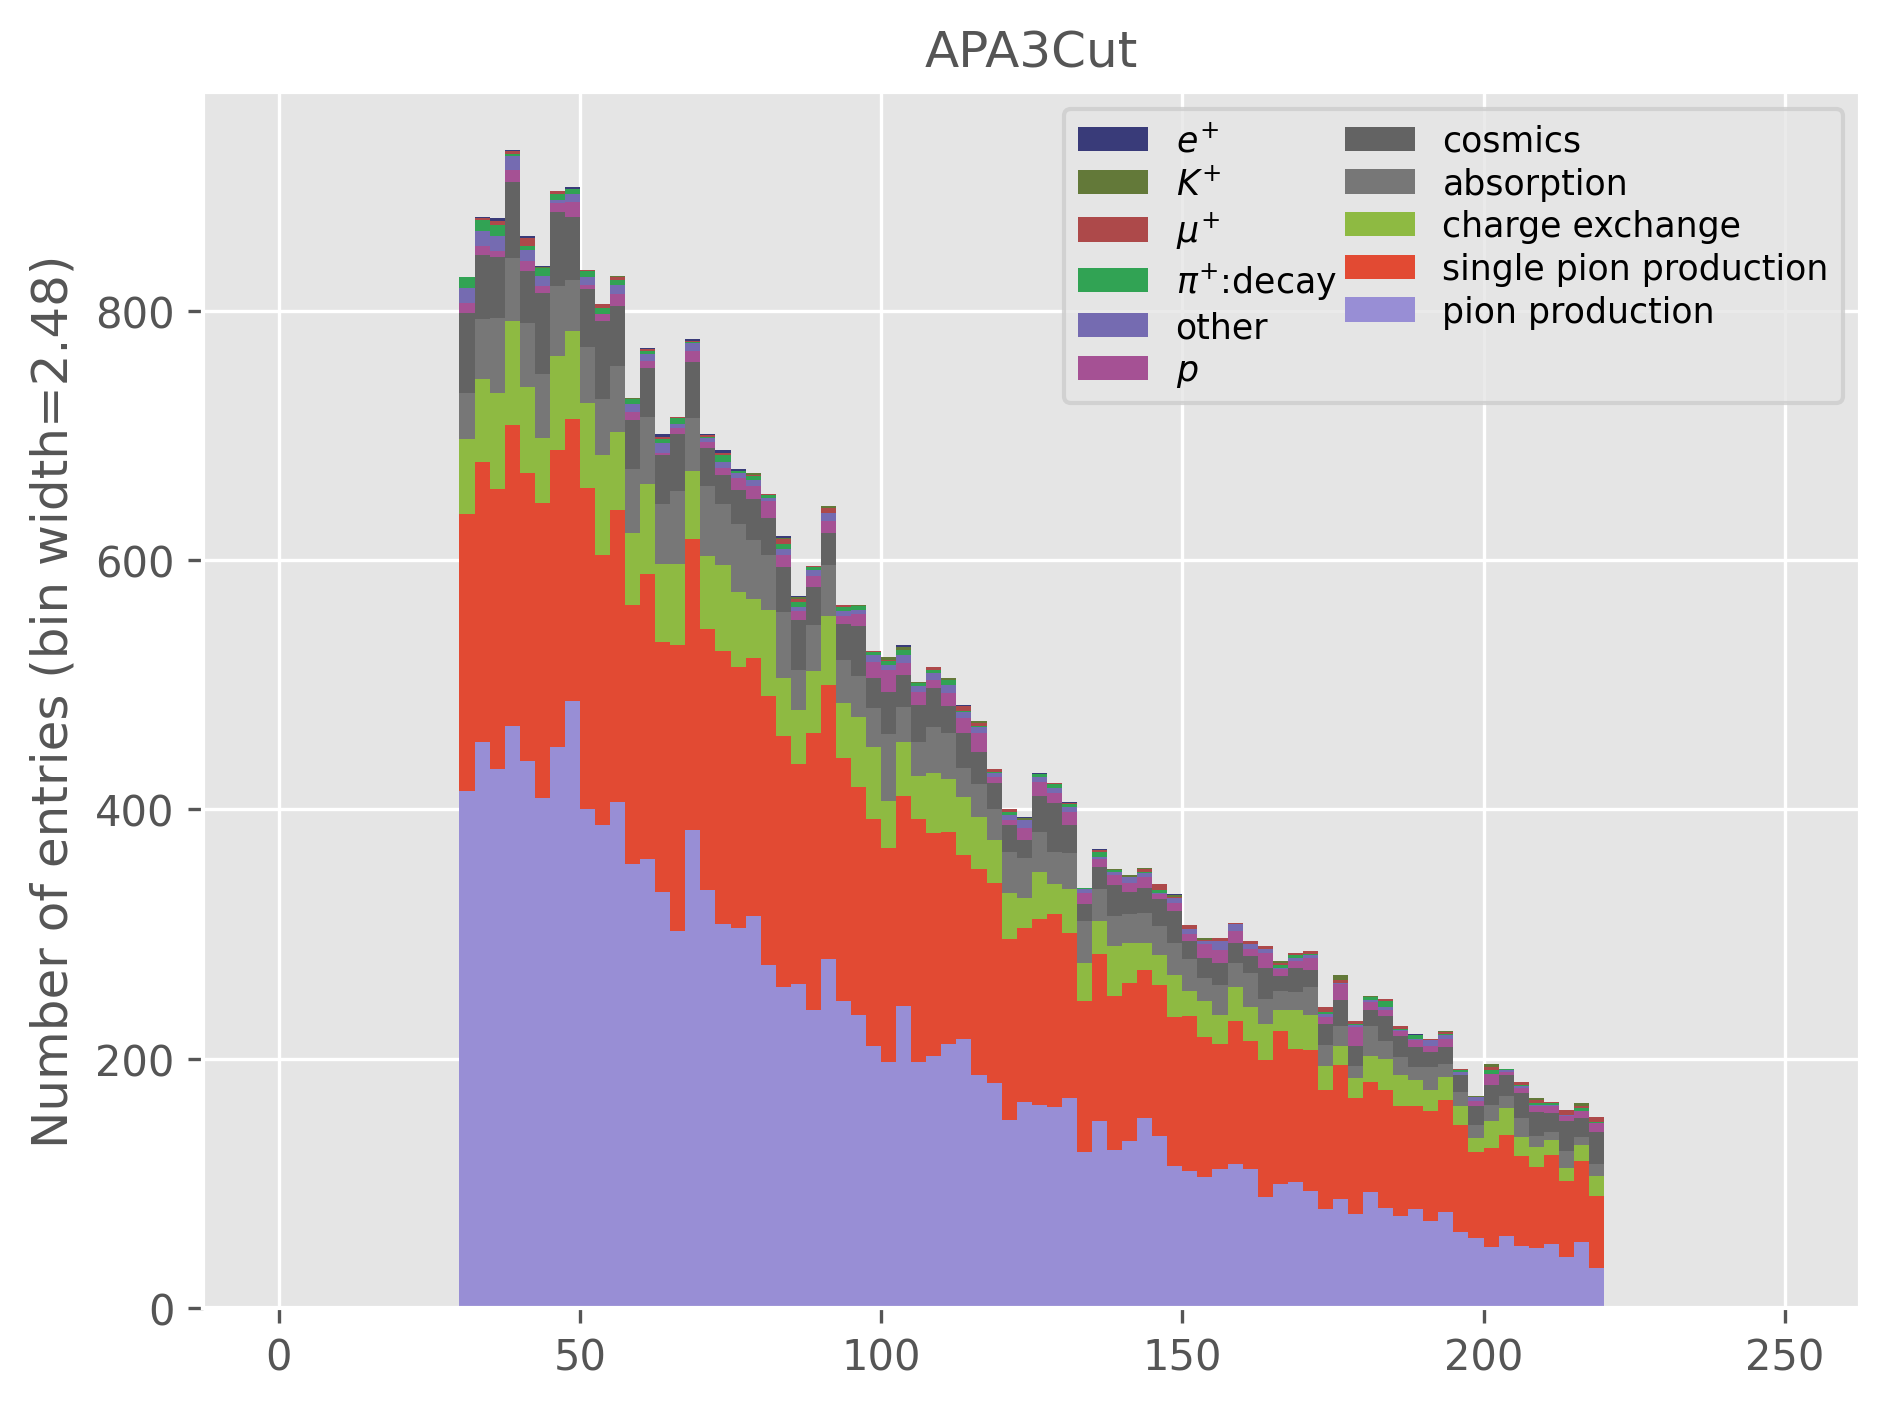

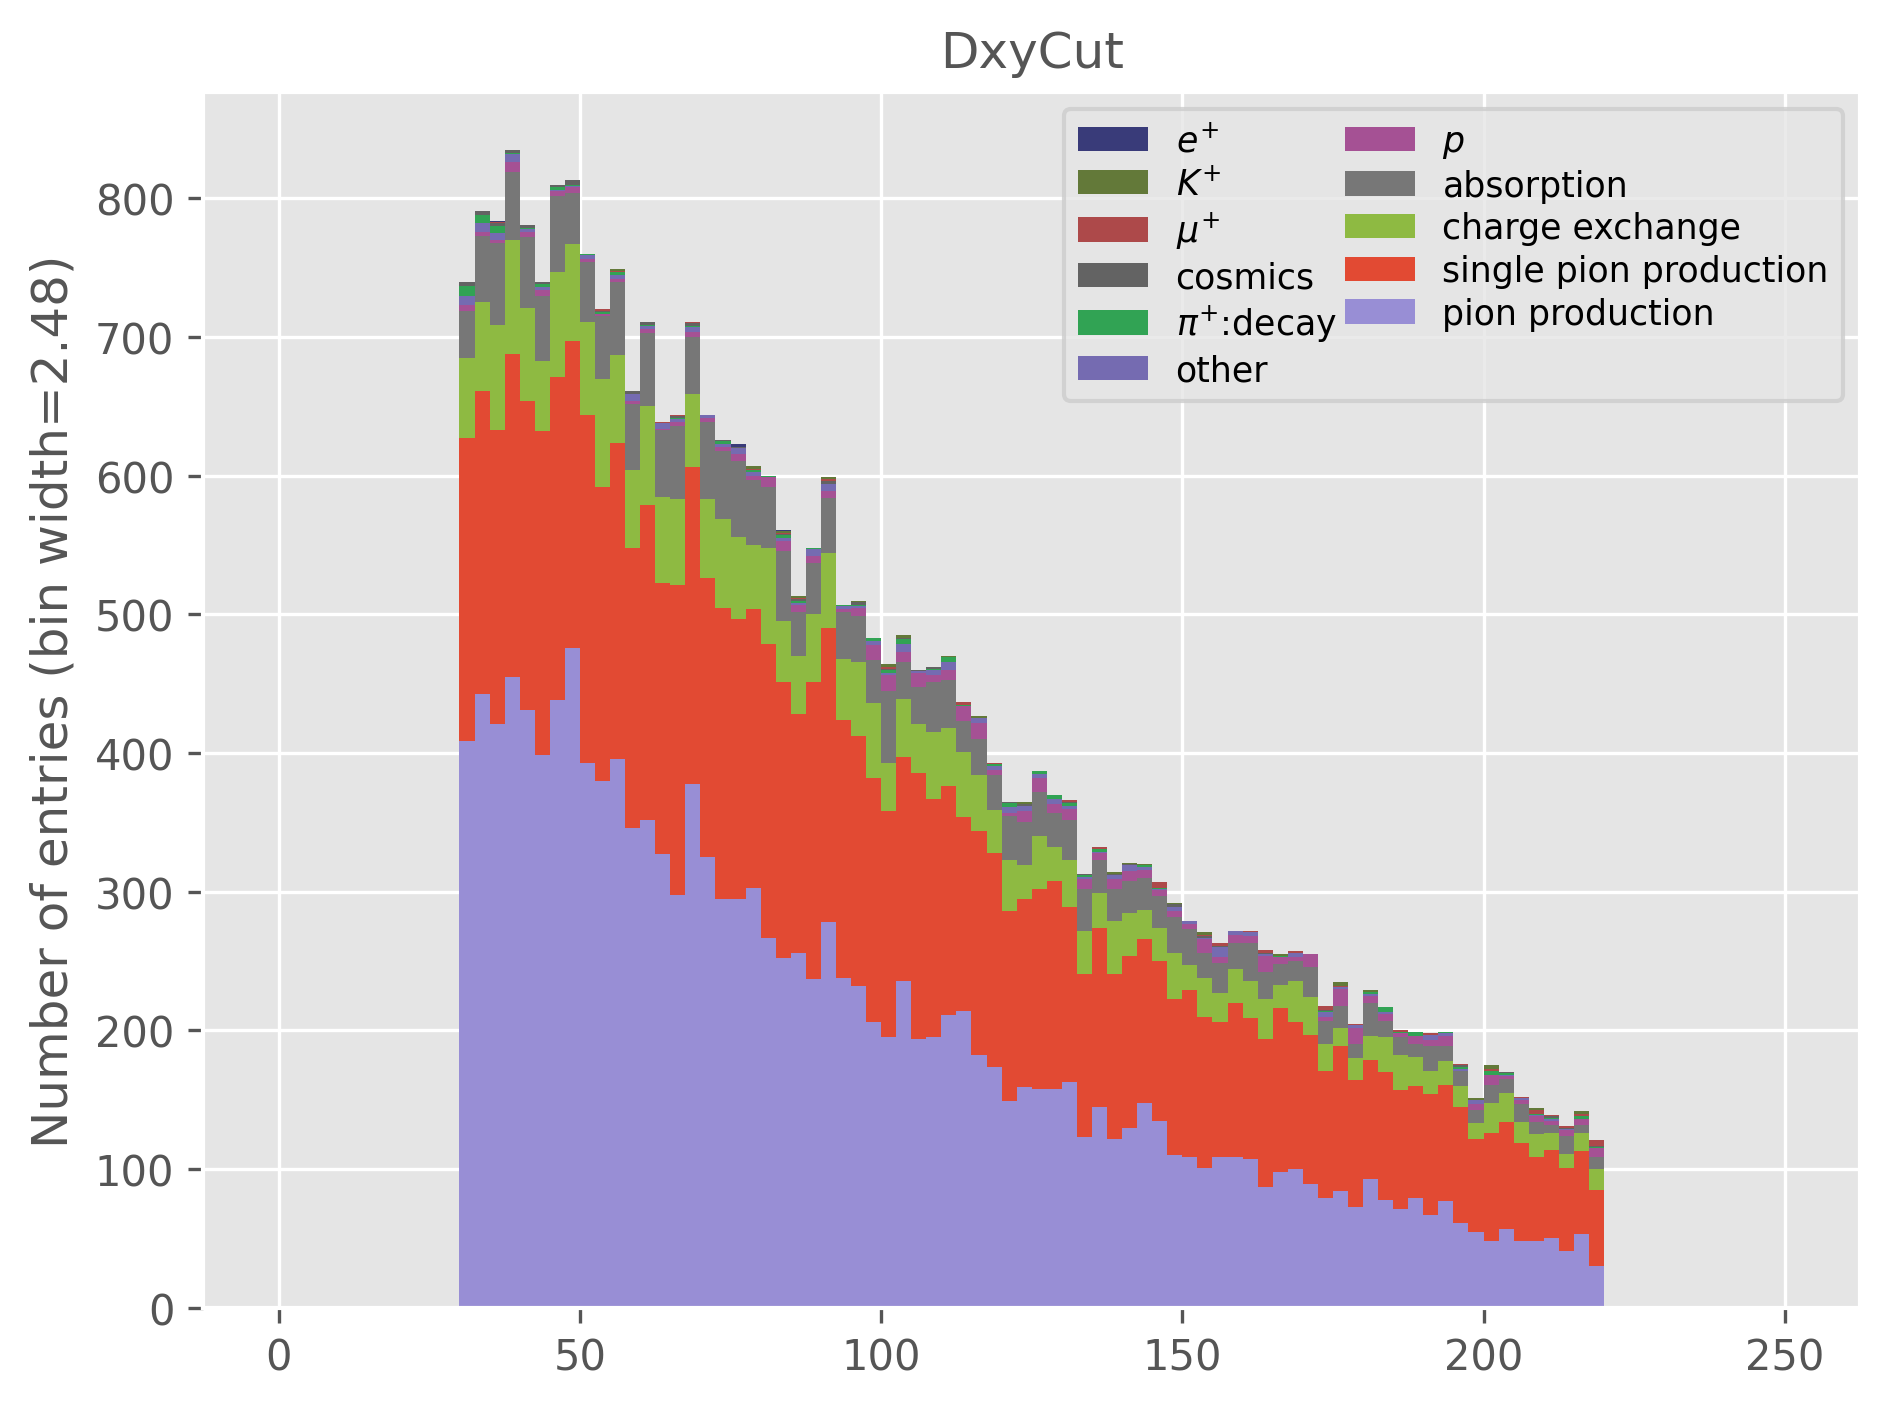

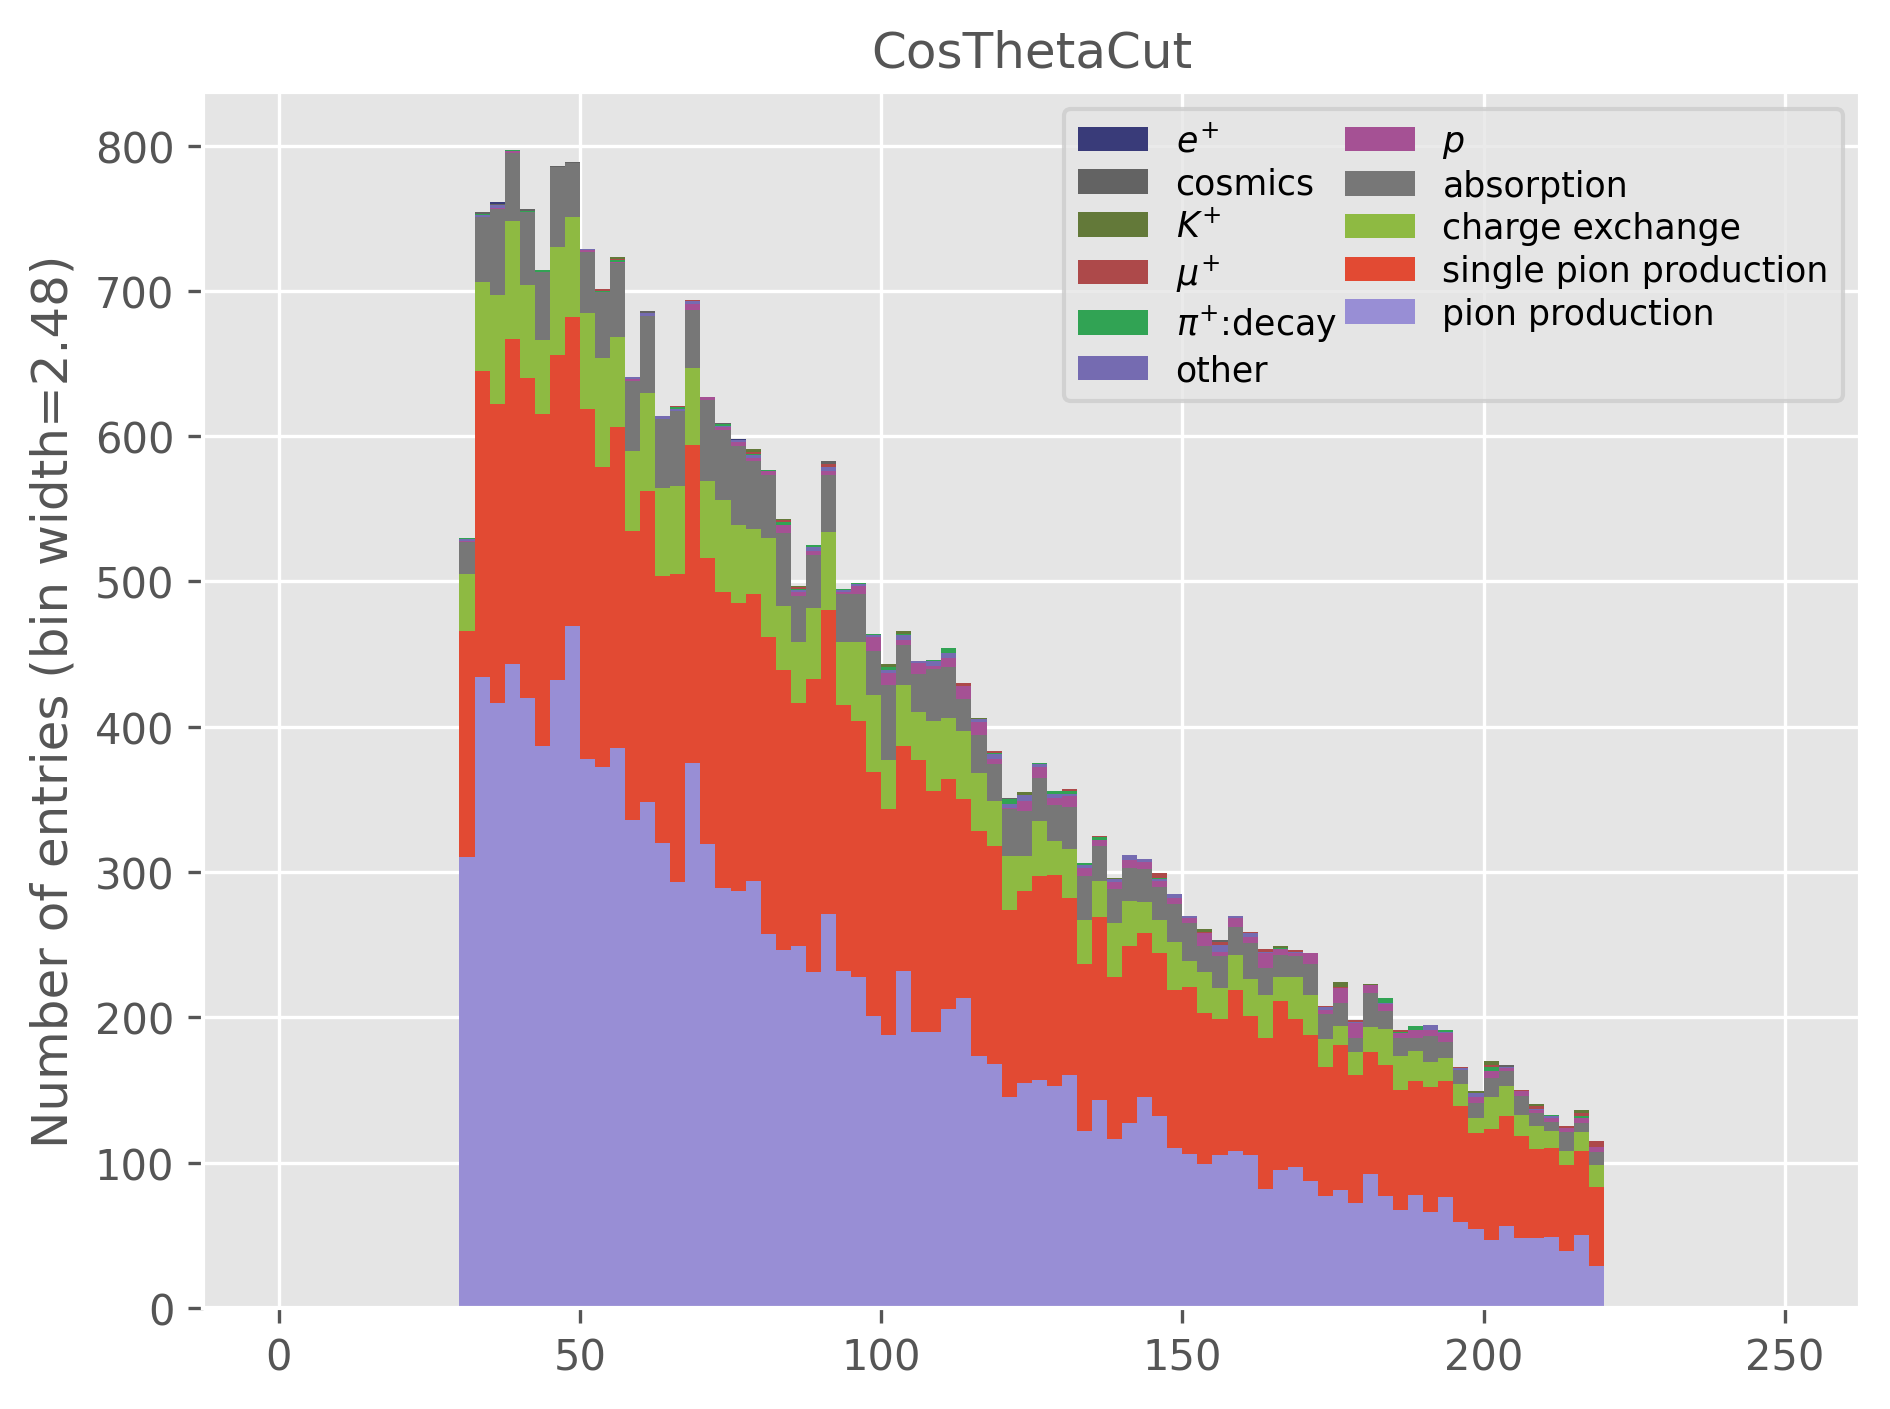

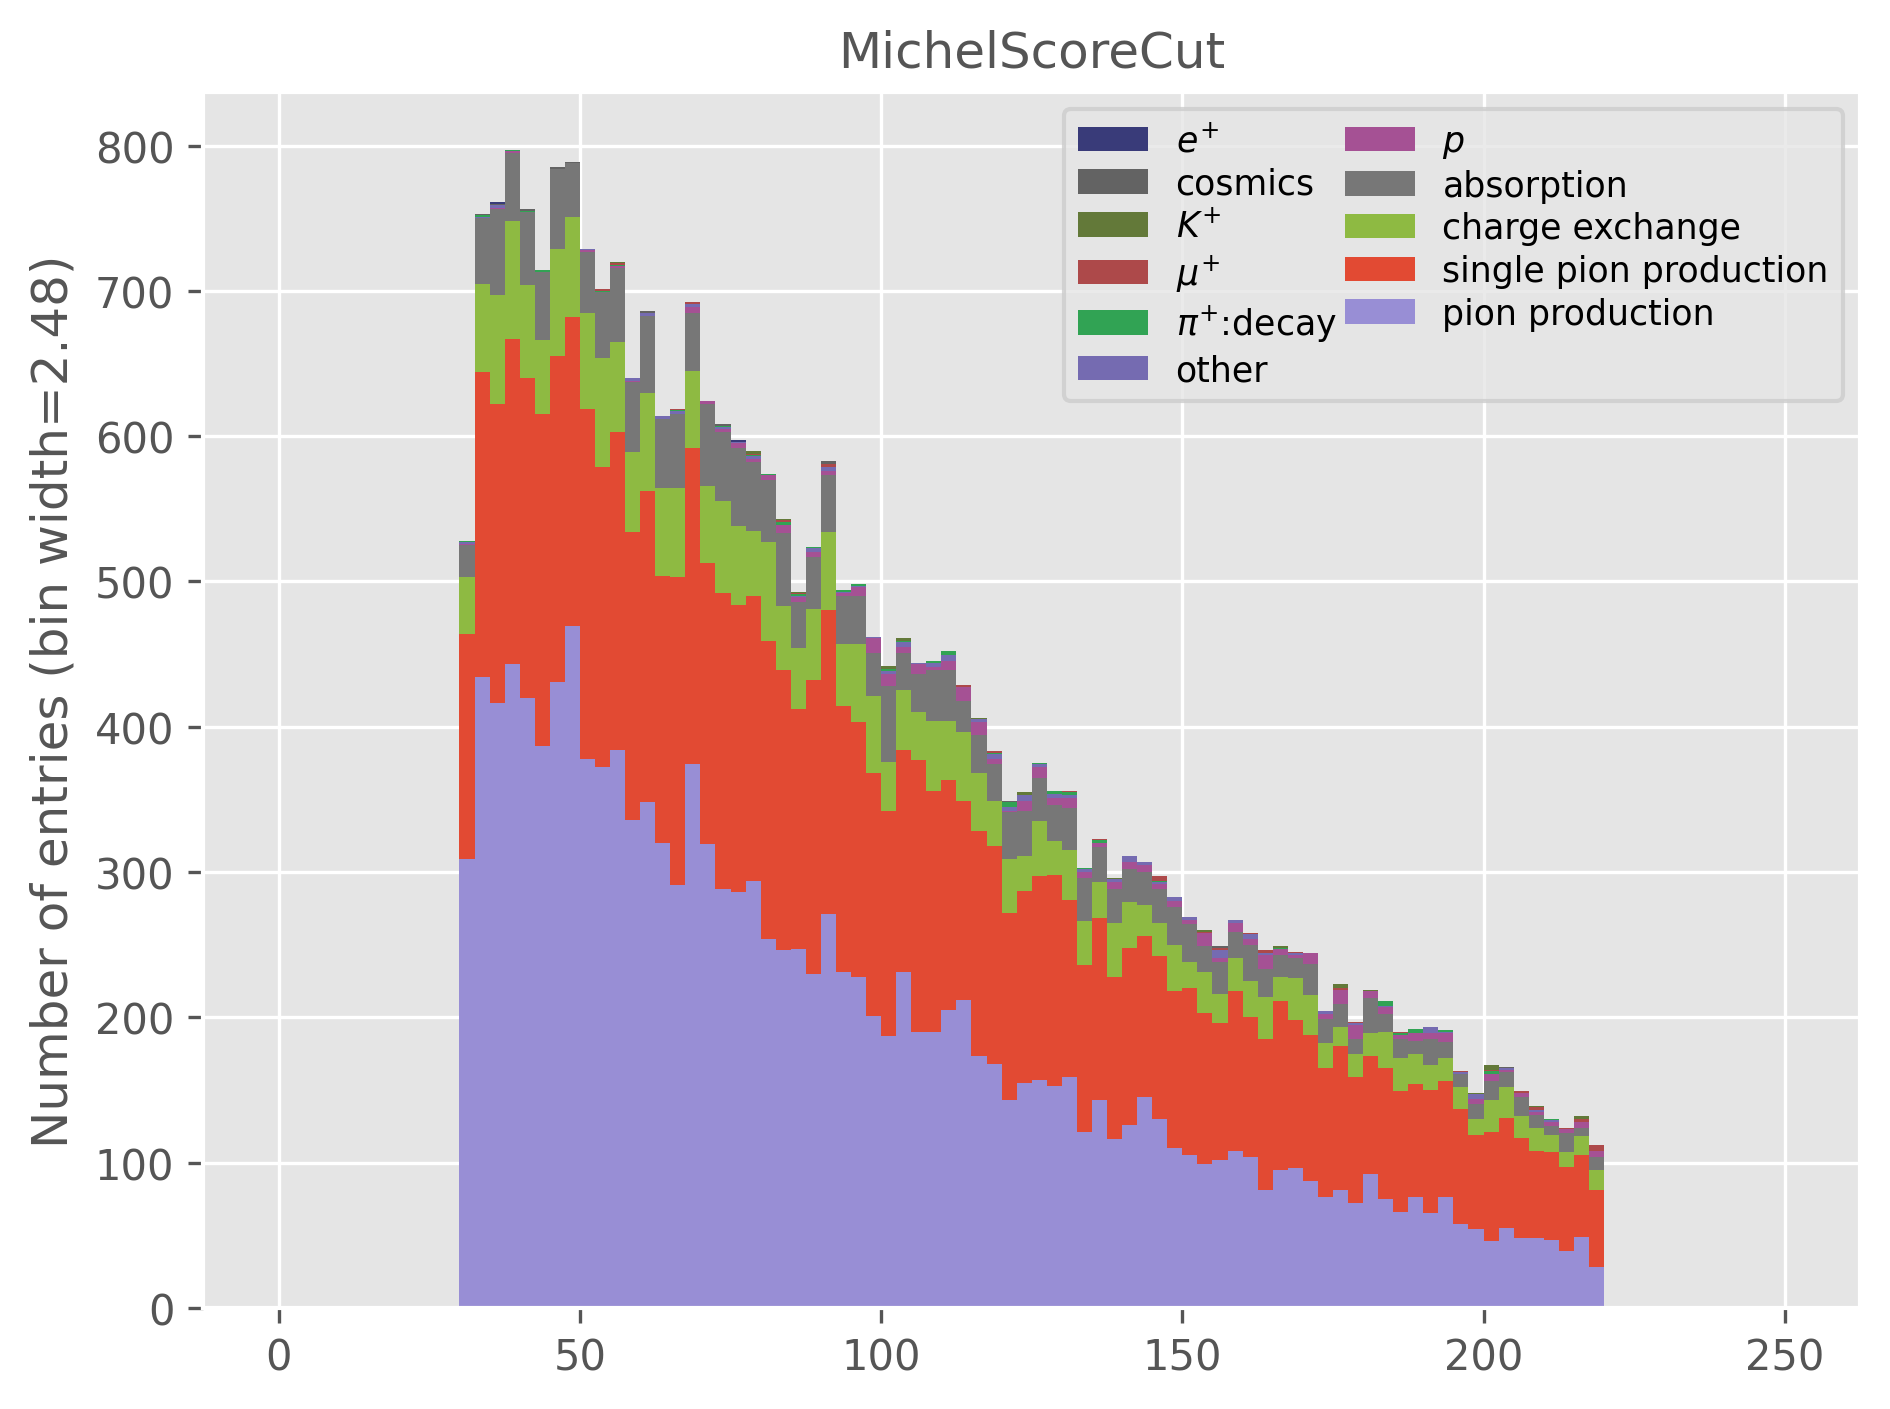

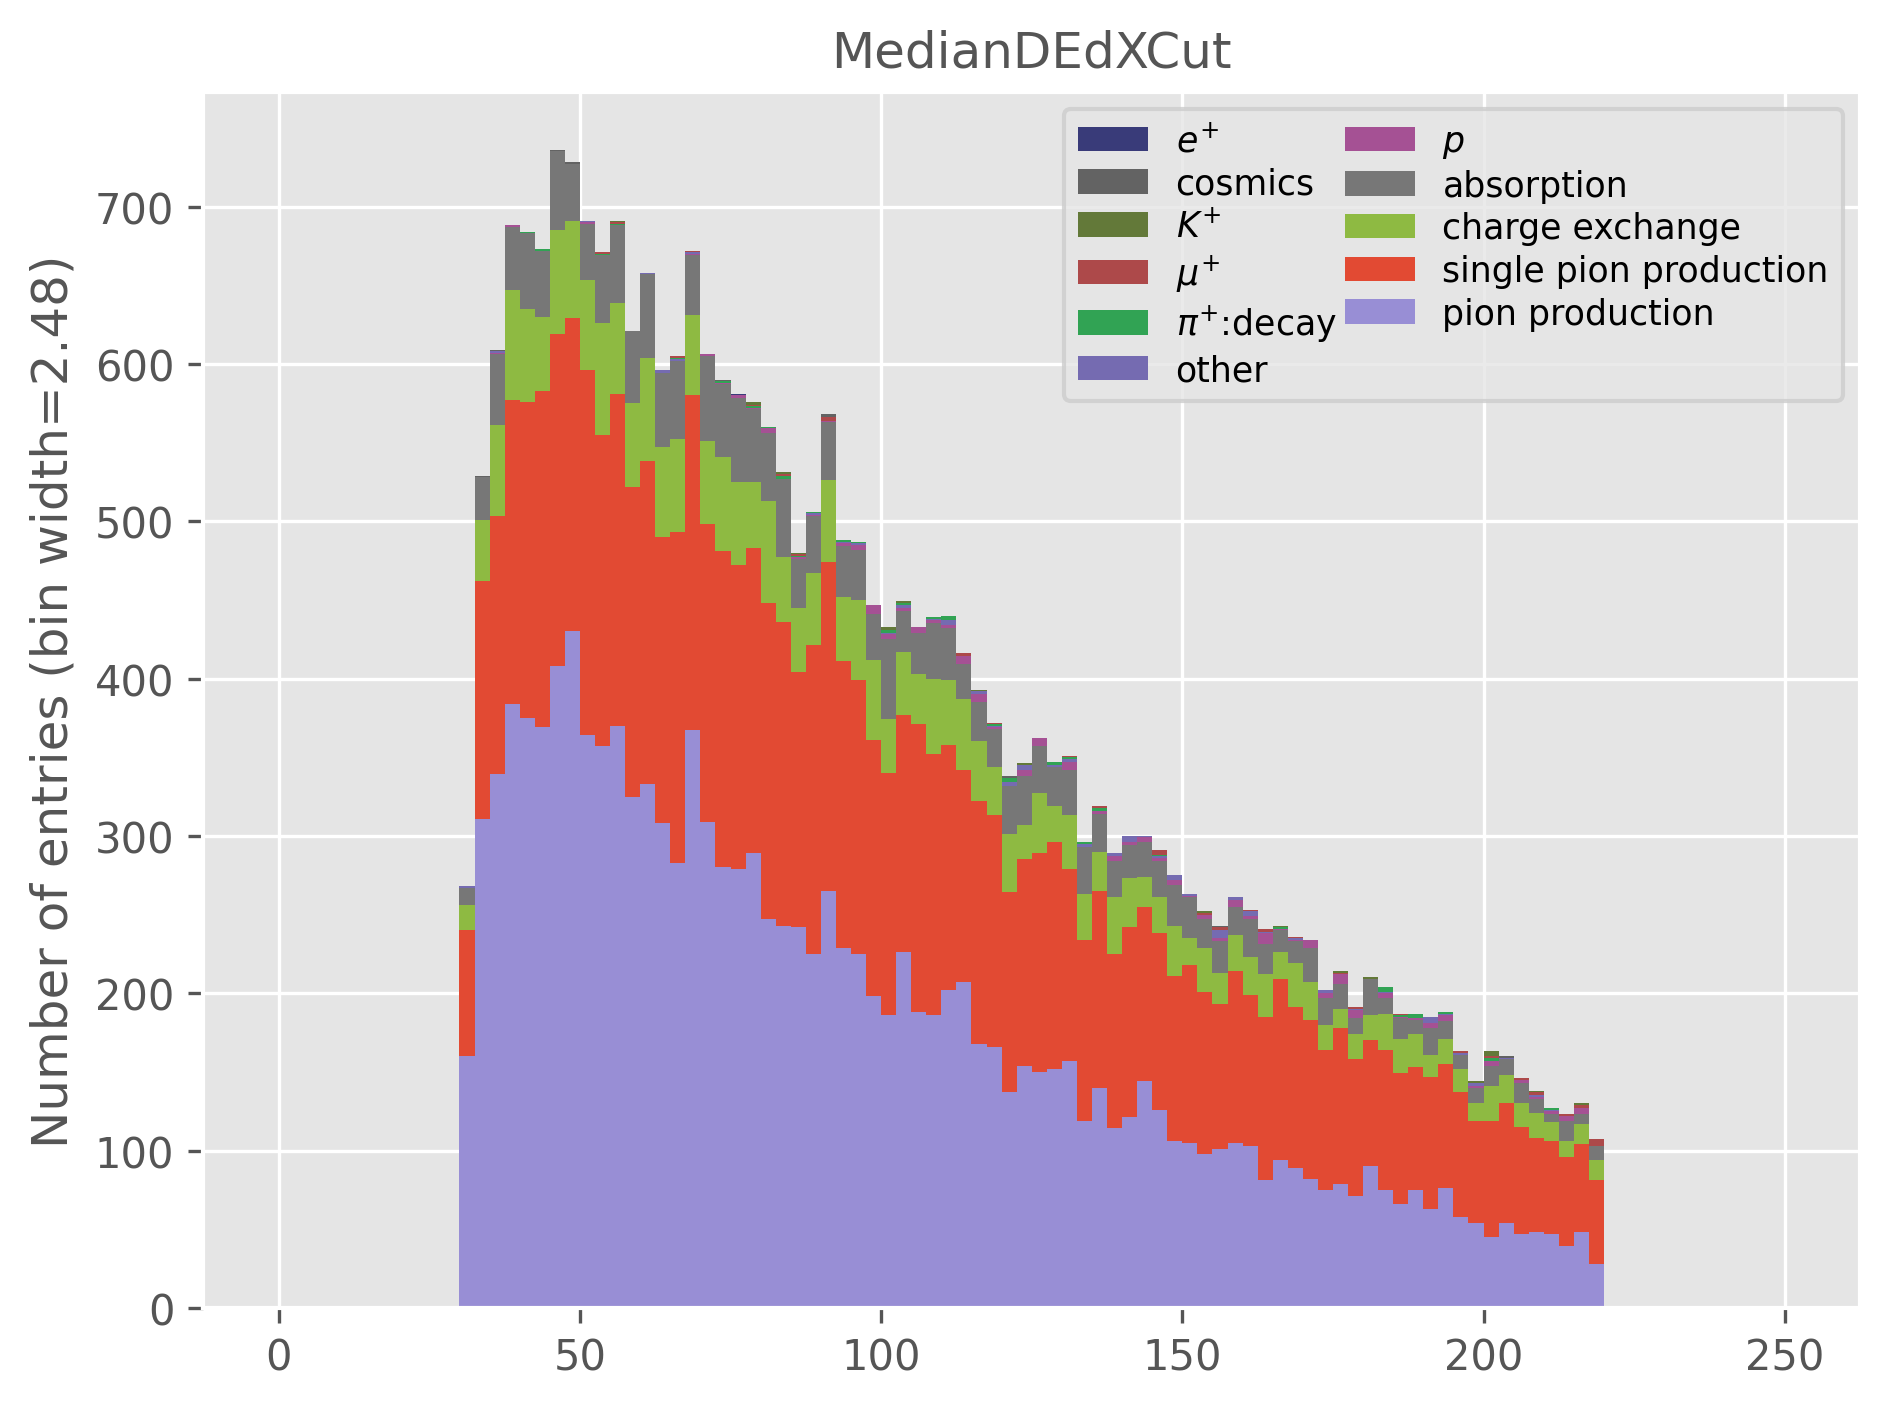

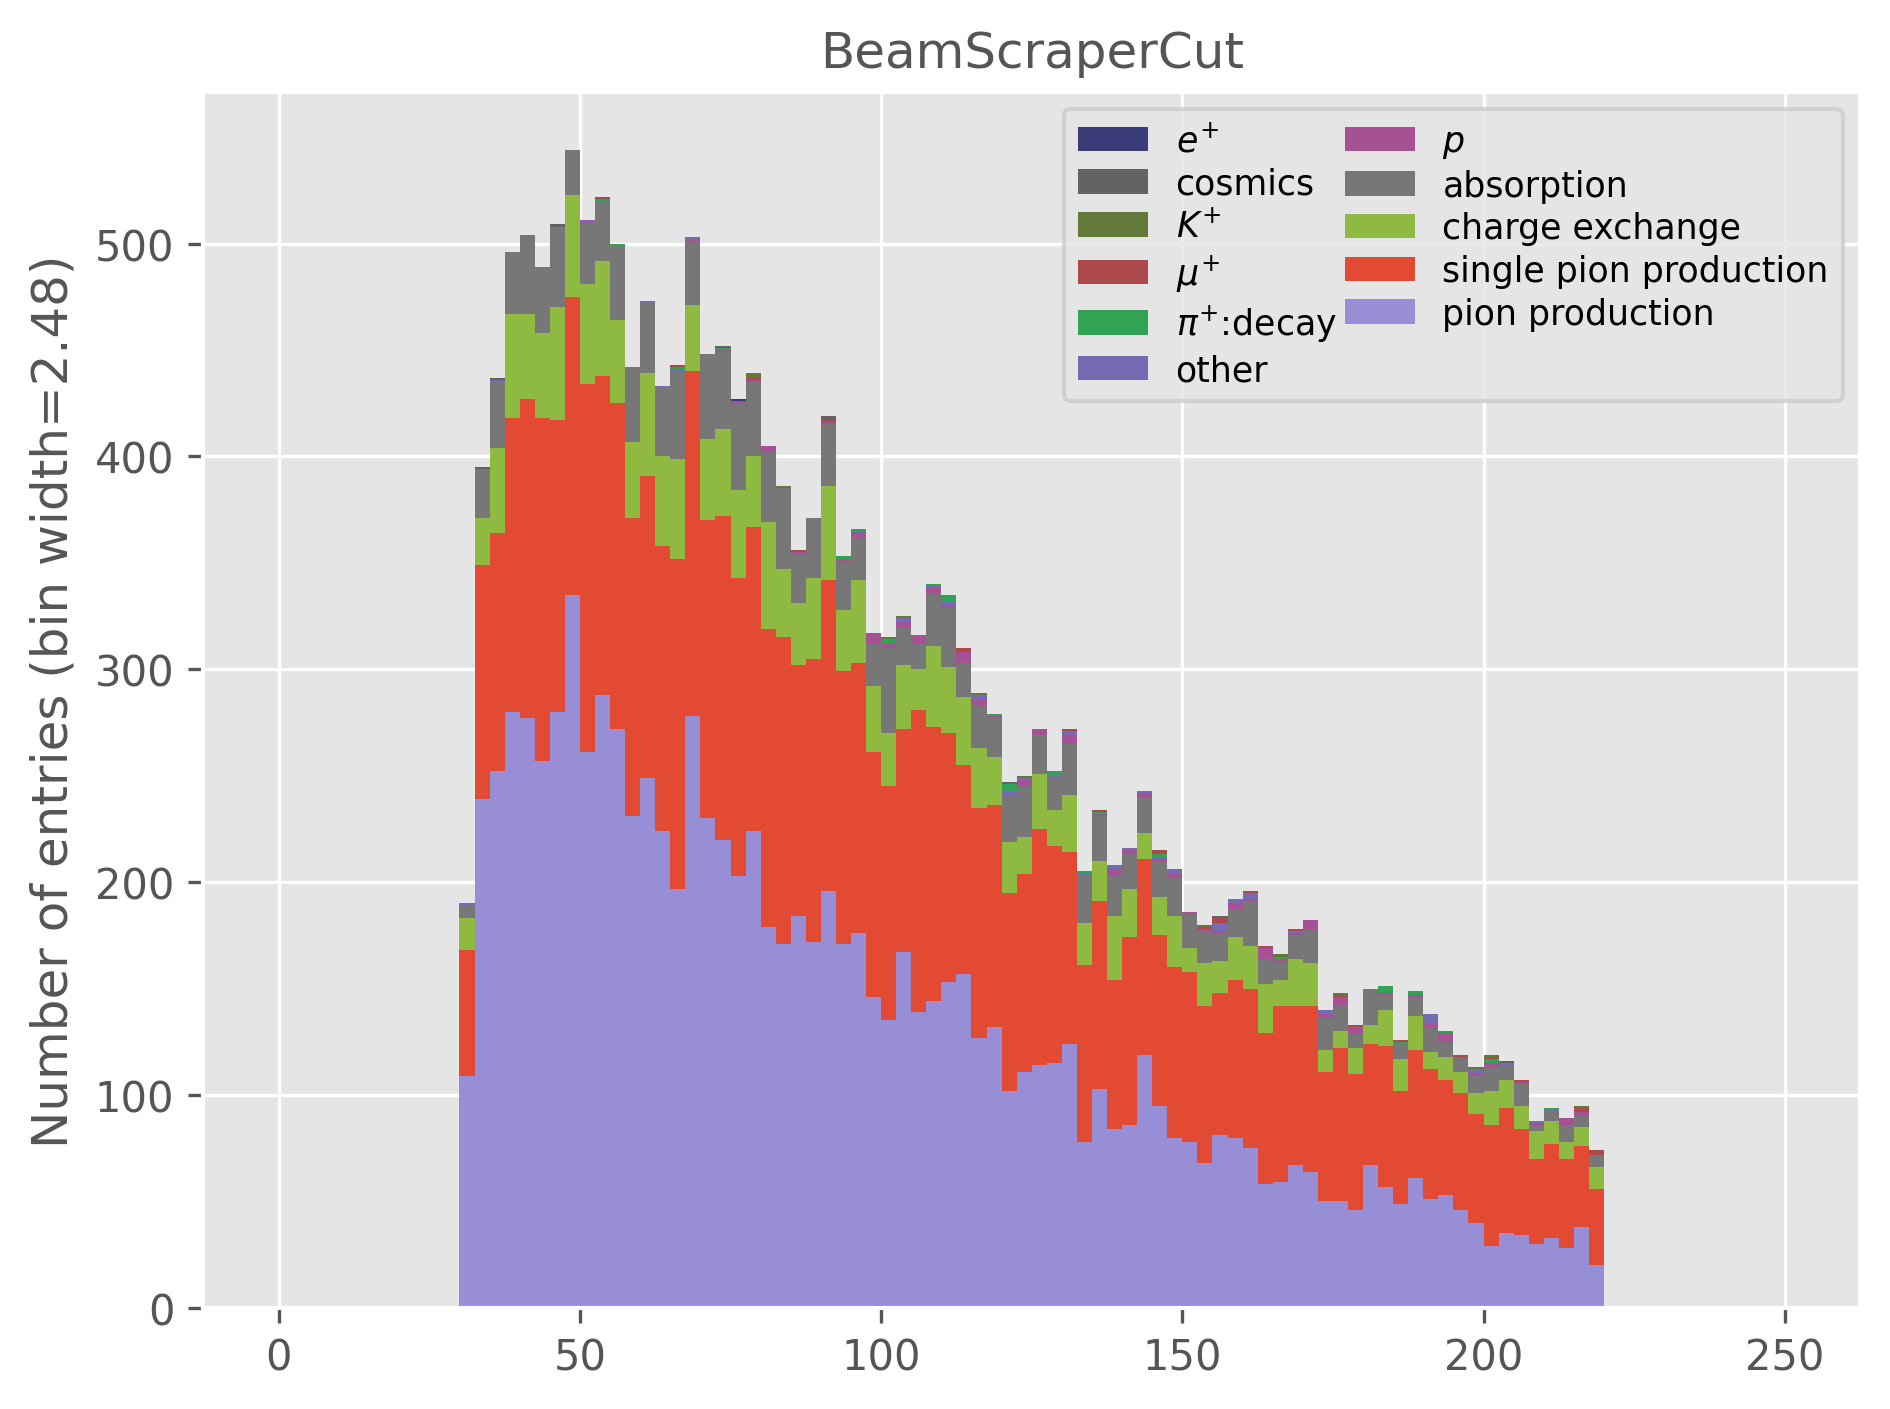

In [175]:
fc = cross_section.SelectionTools.CombineMasks(fiducial_cuts)

beam_tags = UpdateTagMasks(tags, fc)
endz_fc = mc.recoParticles.beam_endPos_SCE.z[fc]


counts = {}
previous_mask = None
for k, v in beam_cuts.items():
    if previous_mask is not None:
        previous_mask = previous_mask & v
    else:
        previous_mask = v

    selected = endz_fc[previous_mask]
    new_tags = UpdateTagMasks(beam_tags, previous_mask)
    cross_section.Plots.PlotTagged(selected, new_tags, x_range = [0, 250], title = k)

    print(k)
    counts[k] = {t : new_tags[t].mask for t in new_tags}

In [ ]:
from rich import print
total = sum([ak.sum(v) for v in counts["BeamScraperCut"].values()])

{
    '$\\pi^{+}$:decay': np.int64(32),
    '$\\mu^{+}$': np.int64(27),
    '$e^{+}$': np.int64(1),
    '$p$': np.int64(104),
    '$K^{+}$': np.int64(13),
    'other': np.int64(50),
    'cosmics': np.int64(9),
    'absorption': np.int64(1542),
    'charge_exchange': np.int64(1959),
    'single_pion_production': np.int64(7522),
    'pion_production': np.int64(10113)
}

{
    '$\\pi^{+}$:decay': np.float64(0.15),
    '$\\mu^{+}$': np.float64(0.13),
    '$e^{+}$': np.float64(0.0),
    '$p$': np.float64(0.49),
    '$K^{+}$': np.float64(0.06),
    'other': np.float64(0.23),
    'cosmics': np.float64(0.04),
    'absorption': np.float64(7.22),
    'charge_exchange': np.float64(9.17),
    'single_pion_production': np.float64(35.2),
    'pion_production': np.float64(47.32)
}

In [173]:
from apps.cex_analysis_input import RegionSelection
reco_regions, _ = RegionSelection(mc, cfg, True, removed = True)


f=<Array [True, False, True, True, ..., False, True, False] type='131266 * bool'>


'RegionSelection' executed in 25.2301s

In [177]:
print(reco_regions)
print(counts["BeamScraperCut"])

{
    'absorption': <Array [False, False, False, ..., False, False, False] type='21372 * bool'>,
    'charge_exchange': <Array [False, False, False, ..., False, False, True] type='21372 * bool'>,
    'single_pion_production': <Array [True, False, True, False, ..., False, False, False] type='21372 * bool'>,
    'pion_production': <Array [False, True, False, False, ..., True, False, False] type='21372 * bool'>,
    'uncategorised': <Array [False, False, False, ..., False, True, False] type='21372 * bool'>
}

{
    '$\\pi^{+}$:decay': <Array [False, False, False, ..., False, False, False] type='21372 * ?bool'>,
    '$\\mu^{+}$': <Array [False, False, False, ..., False, False, False] type='21372 * ?bool'>,
    '$e^{+}$': <Array [False, False, False, ..., False, False, False] type='21372 * ?bool'>,
    '$p$': <Array [False, False, False, ..., False, False, False] type='21372 * ?bool'>,
    '$K^{+}$': <Array [False, False, False, ..., False, False, False] type='21372 * ?bool'>,
    'other': <Array [False, False, False, ..., False, False, False] type='21372 * ?bool'>,
    'cosmics': <Array [False, False, False, ..., False, False, False] type='21372 * ?bool'>,
    'absorption': <Array [False, False, False, ..., False, False, False] type='21372 * ?bool'>,
    'charge_exchange': <Array [False, False, False, ..., False, False, True] type='21372 * ?bool'>,
    'single_pion_production': <Array [True, False, True, True, ..., False, True, False] type='21372 * ?bool'>,
    'pion_production': <Array [False, True, False, ..., True, False, False] type='21372 * ?bool'>
}

pdf regions.pdf has been opened


/home/bhuller/new_python_test/xs_analysis/pi0-analysis/analysis/python/analysis/Utils.py:58: RuntimeWarning: divide by zero encountered in log10
  v = -int(np.ceil(np.log10(abs(x))))+1


pdf regions.pdf has been closed


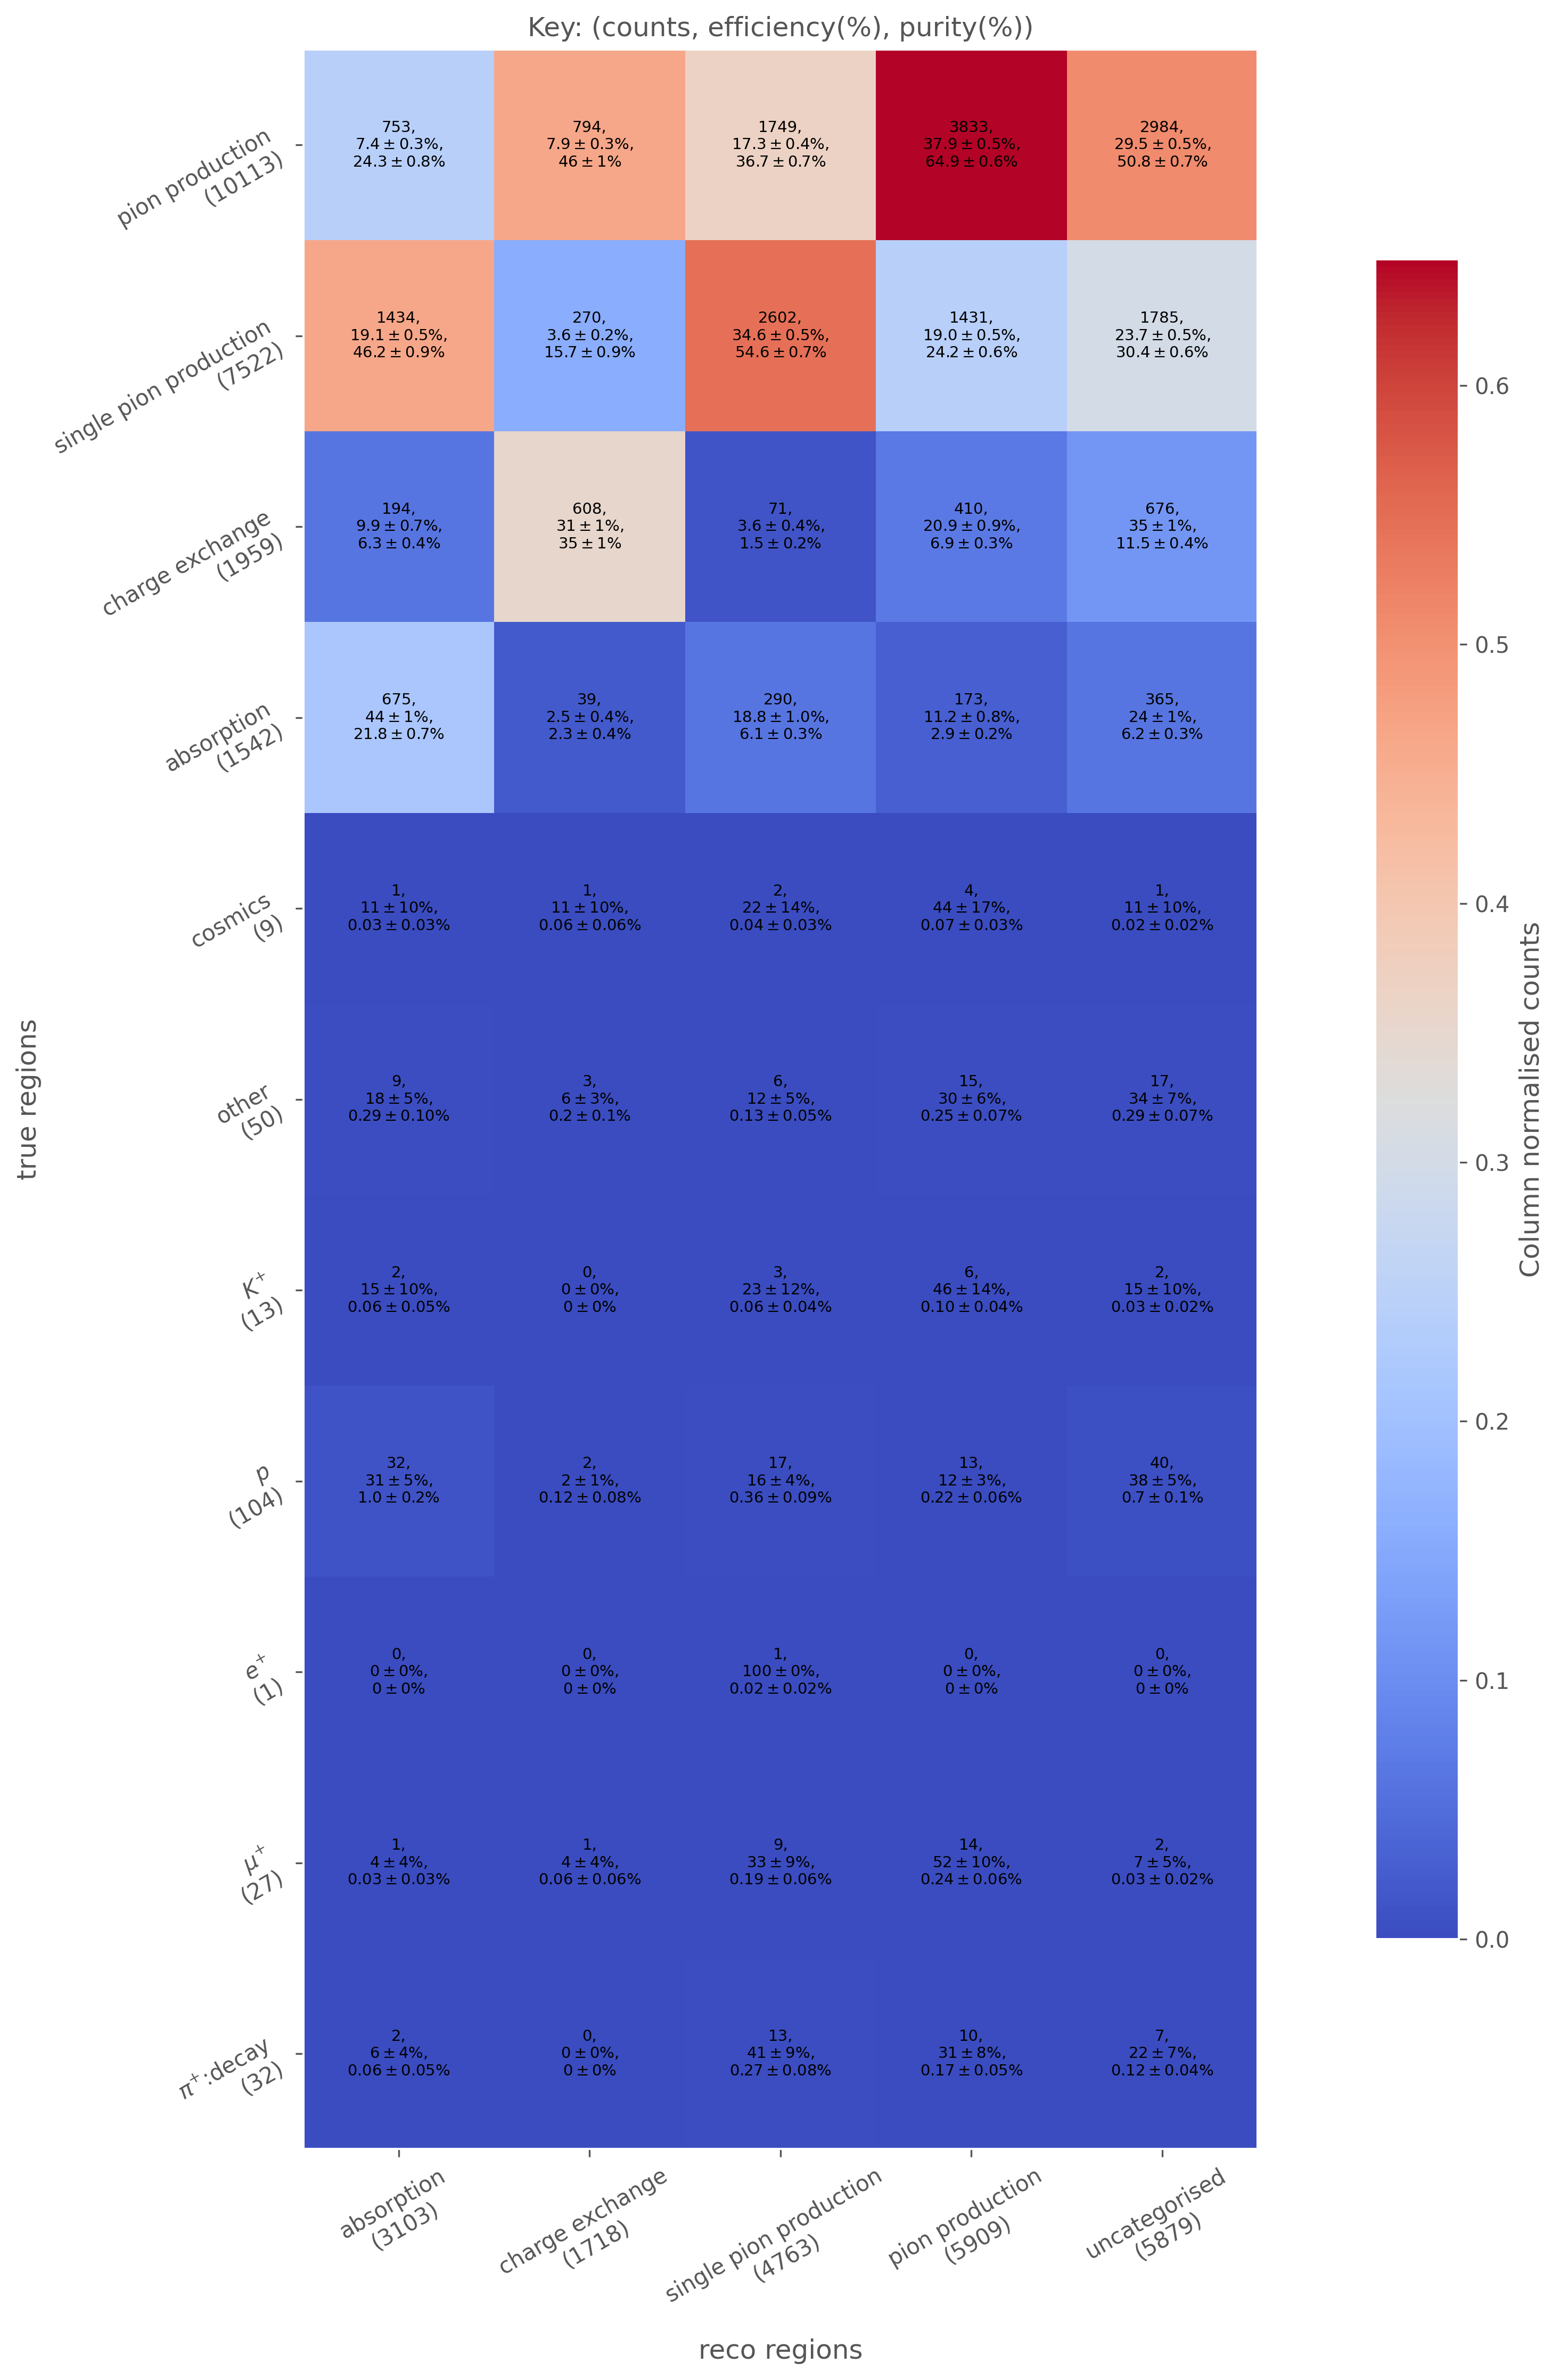

In [197]:
with cross_section.Plots.PlotBook("regions") as book:
    cross_section.Plots.plt.figure(figsize=(15,15))
    cross_section.Plots.PlotConfusionMatrix(cross_section.CountInRegions(counts["BeamScraperCut"], reco_regions), list(reco_regions.keys()), list(counts["BeamScraperCut"].keys()), x_label = "reco regions", y_label = "true regions", newFigure = False, cmap = "coolwarm")
    book.Save()